In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/2022dataset/subset_10k.csv'

Mounted at /content/drive


In [ ]:
data_update = pd.read_csv(file_path)
data_update

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Texas,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.68,113.40,40.35,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
1,Wisconsin,Female,Good,2.0,5.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,1.73,104.33,34.97,Yes,Yes,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
2,Idaho,Male,Poor,7.0,10.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,...,1.73,104.33,34.97,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
3,Iowa,Female,Good,20.0,10.0,Within past year (anytime less than 12 months ...,No,8.0,All,Yes,...,1.68,127.01,45.19,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
4,South Dakota,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.60,49.90,19.49,Yes,No,Yes,No,"Yes, received Tdap",No,Tested positive using home test without a heal...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,South Dakota,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,1 to 5,Yes,...,1.83,108.86,32.55,Yes,No,Yes,Yes,"Yes, received Tdap",No,Yes
9996,North Dakota,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,10.0,None of them,No,...,1.52,58.97,25.39,No,No,No,No,"Yes, received tetanus shot, but not Tdap",No,No
9997,Washington,Female,Very good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.60,58.97,23.03,Yes,Yes,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
9998,Virginia,Female,Good,0.0,4.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.70,105.23,36.34,No,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No


In [ ]:
data_update.isna().sum()

,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
LastCheckupTime,0
PhysicalActivities,0
SleepHours,0
RemovedTeeth,0
HadHeartAttack,0


In [ ]:
data_update.duplicated().sum()

0

In [ ]:
data_copy1 = data_update.copy()
data_copy2 = data_update.copy()
data_copy3 = data_update.copy()


In [ ]:
data_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      10000 non-null  object 
 1   Sex                        10000 non-null  object 
 2   GeneralHealth              10000 non-null  object 
 3   PhysicalHealthDays         10000 non-null  float64
 4   MentalHealthDays           10000 non-null  float64
 5   LastCheckupTime            10000 non-null  object 
 6   PhysicalActivities         10000 non-null  object 
 7   SleepHours                 10000 non-null  float64
 8   RemovedTeeth               10000 non-null  object 
 9   HadHeartAttack             10000 non-null  object 
 10  HadAngina                  10000 non-null  object 
 11  HadStroke                  10000 non-null  object 
 12  HadAsthma                  10000 non-null  object 
 13  HadSkinCancer              10000 non-null  obje

In [ ]:
data_copy1.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.182200,4.214200,7.012700,1.702839,83.396800,28.672903
std,8.459454,8.192132,1.434205,0.106773,21.242542,6.521037
min,0.000000,0.000000,1.000000,0.970000,34.020000,14.640000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.217500
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.450000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.820000
max,30.000000,30.000000,24.000000,2.290000,249.480000,83.450000


In [ ]:
data_copy1.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [ ]:
numerical_cols = data_copy1.select_dtypes(include=['float64','number']).columns
numerical_data = data_copy1[numerical_cols]
numerical_data

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
0,0.0,0.0,8.0,1.68,113.40,40.35
1,2.0,5.0,8.0,1.73,104.33,34.97
2,7.0,10.0,6.0,1.73,104.33,34.97
3,20.0,10.0,8.0,1.68,127.01,45.19
4,0.0,0.0,7.0,1.60,49.90,19.49
...,...,...,...,...,...,...
9995,0.0,0.0,8.0,1.83,108.86,32.55
9996,0.0,0.0,10.0,1.52,58.97,25.39
9997,0.0,3.0,6.0,1.60,58.97,23.03
9998,0.0,4.0,5.0,1.70,105.23,36.34


In [ ]:
categorical_cols = data_copy1.select_dtypes(include=['object','category']).columns
for col in categorical_cols:
    print(f"Levels in '{col}': {data_update[col].unique()}")
    print(f"Number of levels: {data_update[col].nunique()}")
    print('-' * 40)

Levels in 'State': ['Texas' 'Wisconsin' 'Idaho' 'Iowa' 'South Dakota' 'Maryland' 'Maine'
 'Ohio' 'Illinois' 'Colorado' 'Kentucky' 'Delaware' 'California' 'Utah'
 'Indiana' 'Michigan' 'New Hampshire' 'Washington' 'Arkansas' 'Florida'
 'New Mexico' 'Louisiana' 'Georgia' 'Oregon' 'New York' 'Nebraska'
 'Mississippi' 'Massachusetts' 'Tennessee' 'Virginia' 'Kansas'
 'Puerto Rico' 'Minnesota' 'South Carolina' 'Hawaii' 'North Carolina'
 'Nevada' 'Montana' 'North Dakota' 'Wyoming' 'Vermont'
 'District of Columbia' 'West Virginia' 'New Jersey' 'Guam' 'Rhode Island'
 'Alabama' 'Connecticut' 'Missouri' 'Oklahoma' 'Arizona' 'Virgin Islands'
 'Pennsylvania' 'Alaska']
Number of levels: 54
----------------------------------------
Levels in 'Sex': ['Female' 'Male']
Number of levels: 2
----------------------------------------
Levels in 'GeneralHealth': ['Good' 'Poor' 'Excellent' 'Very good' 'Fair']
Number of levels: 5
----------------------------------------
Levels in 'LastCheckupTime': ['Within past y

In [ ]:
data_copy1['HeartConditionBinary'] = ((data_copy1['HadHeartAttack'] == 'Yes') | (data_copy1['HadAngina'] == 'Yes')).astype(int)
data_copy1

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartConditionBinary
0,Texas,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,113.40,40.35,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,0
1,Wisconsin,Female,Good,2.0,5.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,104.33,34.97,Yes,Yes,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No,0
2,Idaho,Male,Poor,7.0,10.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,...,104.33,34.97,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,1
3,Iowa,Female,Good,20.0,10.0,Within past year (anytime less than 12 months ...,No,8.0,All,Yes,...,127.01,45.19,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,1
4,South Dakota,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,49.90,19.49,Yes,No,Yes,No,"Yes, received Tdap",No,Tested positive using home test without a heal...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,South Dakota,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,1 to 5,Yes,...,108.86,32.55,Yes,No,Yes,Yes,"Yes, received Tdap",No,Yes,1
9996,North Dakota,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,10.0,None of them,No,...,58.97,25.39,No,No,No,No,"Yes, received tetanus shot, but not Tdap",No,No,0
9997,Washington,Female,Very good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,58.97,23.03,Yes,Yes,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No,0
9998,Virginia,Female,Good,0.0,4.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,105.23,36.34,No,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No,1


In [ ]:
data_copy1 = data_copy1.drop(['HadHeartAttack','HadAngina'],axis=1)

In [ ]:
class_counts = data_copy1['HeartConditionBinary'].value_counts()
class_counts

,count
HeartConditionBinary,
0,9146
1,854


In [ ]:
# Performing Chi-Square test and storing results in a DataFrame for better observation
chi_square_results = []

# Loop through each categorical column and perform the test
for col in categorical_cols:
    if col in data_copy1.columns and col != 'HadHeartAttack' and col != 'HadAngina':
        # Create the contingency table
        contingency_table = pd.crosstab(data_copy1[col], data_copy1['HeartConditionBinary'])

        # Perform the Chi-Square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Determine significance
        significant = 'Yes' if p < 0.05 else 'No'

        # Store results
        chi_square_results.append({"Variable": col, "P-Value": p, "Significant": significant})

# Convert the results to a DataFrame and sort by p-value
chi_square_df = pd.DataFrame(chi_square_results).sort_values(by='P-Value')

# Display the results
print("\nChi-Square Test Results:")
print(chi_square_df)


Chi-Square Test Results:
                     Variable        P-Value Significant
2               GeneralHealth  7.606454e-116         Yes
24                AgeCategory  2.170116e-115         Yes
22                  ChestScan   1.919559e-87         Yes
6                   HadStroke   9.458672e-83         Yes
17          DifficultyWalking   4.217451e-76         Yes
28              PneumoVaxEver   1.901250e-73         Yes
13                HadDiabetes   4.384363e-68         Yes
5                RemovedTeeth   1.720898e-66         Yes
9                     HadCOPD   1.873124e-63         Yes
11           HadKidneyDisease   9.459749e-61         Yes
12               HadArthritis   2.870919e-59         Yes
14        DeafOrHardOfHearing   1.947014e-31         Yes
20               SmokerStatus   5.404913e-26         Yes
3             LastCheckupTime   5.373167e-21         Yes
19          DifficultyErrands   6.395780e-21         Yes
18  DifficultyDressingBathing   8.368873e-21         Yes
25   

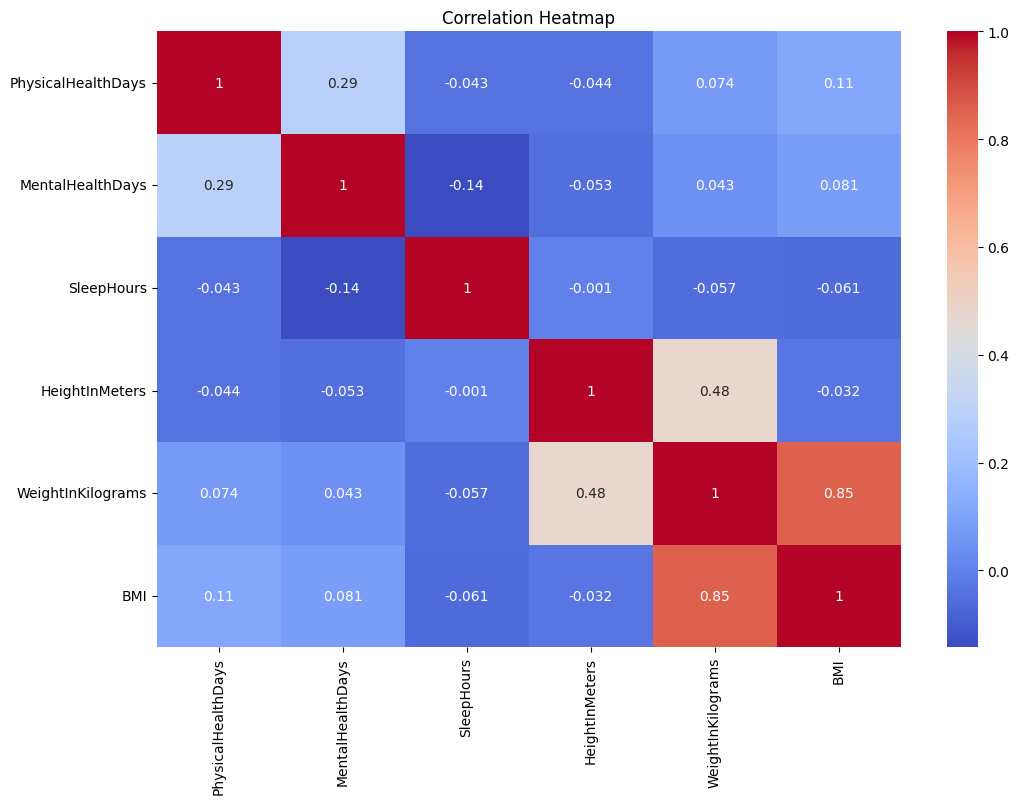

In [ ]:
# Correlation matrix for numerical columns
correlation_matrix = data_copy1[numerical_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
nominal_features = ['State', 'RaceEthnicityCategory', 'TetanusLast10Tdap', 'CovidPos','RemovedTeeth','SmokerStatus','ECigaretteUsage','HadDiabetes']
binary_features = [
     'HadStroke', 'HadAsthma', 'HadSkinCancer',
    'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
    'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating',
    'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
    'PhysicalActivities', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
    'PneumoVaxEver', 'HighRiskLastYear', 'ChestScan'
]
ordinal_features = ['GeneralHealth', 'LastCheckupTime', 'AgeCategory']

data_copy1['Sex'] = data_copy1['Sex'].replace({'Male':1,'Female':0})


<ipython-input-17-90263386828c>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy1['Sex'] = data_copy1['Sex'].replace({'Male':1,'Female':0})


In [ ]:
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
nominal_encoded = pd.DataFrame(
    one_hot_encoder.fit_transform(data_copy1[nominal_features]),
    columns=one_hot_encoder.get_feature_names_out(nominal_features),
    index=data_copy1.index  # Align indices with the original DataFrame
)

binary_encoded = data_copy1[binary_features].replace({'Yes': 1, 'No': 0}).astype(int)


ordinal_mappings = {
    'GeneralHealth': ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'],
    'LastCheckupTime': [
        '5 or more years ago',
        'Within past 5 years (2 years but less than 5 years ago)',
        'Within past 2 years (1 year but less than 2 years ago)',
        'Within past year (anytime less than 12 months ago)'
    ],
    'AgeCategory':[
        'Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59','Age 60 to 64', 'Age 65 to 69'
         ,'Age 70 to 74','Age 75 to 79','Age 80 or older'
    ]
}

ordinal_encoded = data_copy1[ordinal_features].replace({
    col: {val: i for i, val in enumerate(vals)} for col, vals in ordinal_mappings.items()
})

<ipython-input-18-2b01ca78c0a6>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  binary_encoded = data_copy1[binary_features].replace({'Yes': 1, 'No': 0}).astype(int)
<ipython-input-18-2b01ca78c0a6>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ordinal_encoded = data_copy1[ordinal_features].replace({


In [ ]:
processed_data = pd.concat([nominal_encoded, binary_encoded, ordinal_encoded,numerical_data], axis=1)
processed_data['HeartConditionBinary'] = data_copy1['HeartConditionBinary'].values

In [ ]:
class_counts1 = processed_data['HeartConditionBinary'].value_counts()
class_counts1

,count
HeartConditionBinary,
0,9146
1,854


In [ ]:
processed_data

,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,...,GeneralHealth,LastCheckupTime,AgeCategory,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,HeartConditionBinary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,6,0.0,0.0,8.0,1.68,113.40,40.35,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,9,2.0,5.0,8.0,1.73,104.33,34.97,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,1,7.0,10.0,6.0,1.73,104.33,34.97,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,8,20.0,10.0,8.0,1.68,127.01,45.19,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,3,8,0.0,0.0,7.0,1.60,49.90,19.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,12,0.0,0.0,8.0,1.83,108.86,32.55,1
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,11,0.0,0.0,10.0,1.52,58.97,25.39,0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,2,3,0.0,3.0,6.0,1.60,58.97,23.03,0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,9,0.0,4.0,5.0,1.70,105.23,36.34,1


In [ ]:
# Check if indices match between the original target and processed data
print(data_copy1['HeartConditionBinary'].index.equals(processed_data.index))  # Should return True

# Ensure no missing values in the target column
print(processed_data['HeartConditionBinary'].isnull().sum())

True
0


In [ ]:
processed_data.columns

Index(['State_Alabama', 'State_Alaska', 'State_Arizona', 'State_Arkansas',
       'State_California', 'State_Colorado', 'State_Connecticut',
       'State_Delaware', 'State_District of Columbia', 'State_Florida',
       ...
       'GeneralHealth', 'LastCheckupTime', 'AgeCategory', 'PhysicalHealthDays',
       'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms',
       'BMI', 'HeartConditionBinary'],
      dtype='object', length=112)

In [ ]:
from sklearn.ensemble import IsolationForest

# Initializing and training the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(processed_data)

# Adding the 'Outlier' column to the DataFrame
processed_data['Outlier'] = outliers

# Calculating the percentage of outliers detected
total_samples = len(processed_data)
outlier_count = (processed_data['Outlier'] == -1).sum()
outlier_percentage = (outlier_count / total_samples) * 100

# Display the percentage of outliers detected
print(f"Total Samples: {total_samples}")
print(f"Number of Outliers Detected: {outlier_count}")
print(f"Percentage of Outliers Detected: {outlier_percentage:.2f}%")

Total Samples: 10000
Number of Outliers Detected: 500
Percentage of Outliers Detected: 5.00%


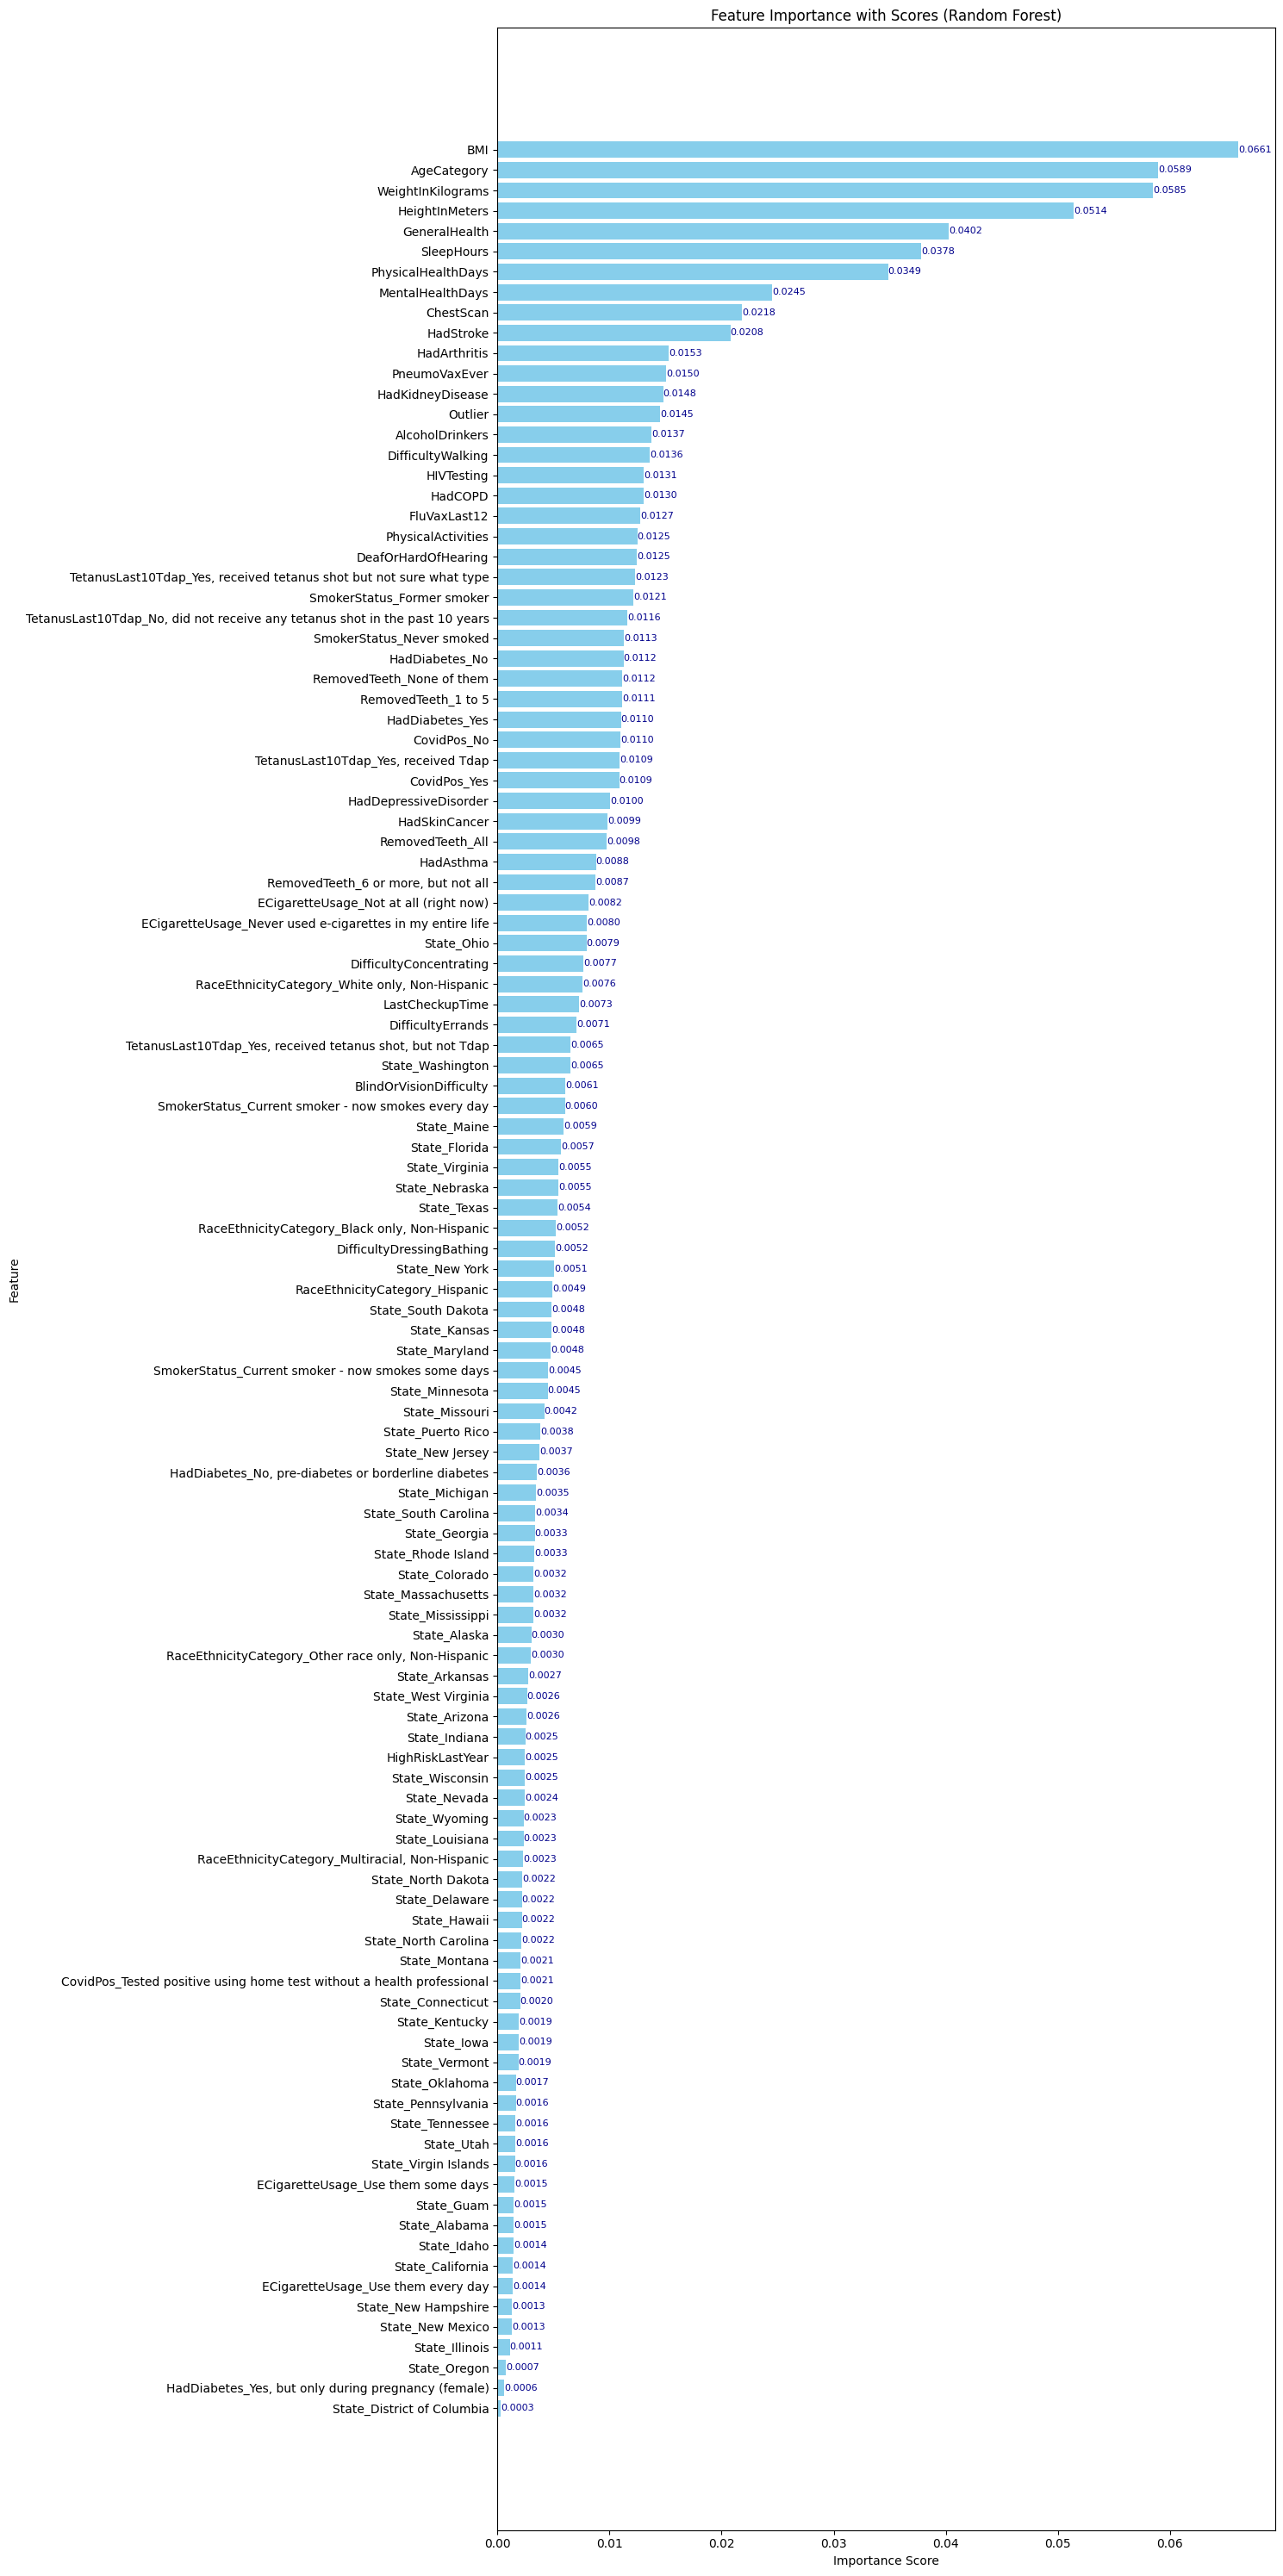

In [ ]:
X = processed_data.drop(columns=['HeartConditionBinary'])
y = processed_data['HeartConditionBinary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)# Train a Random Forest model
model = RandomForestClassifier(random_state=10)
model.fit(X_train, y_train)

# Get feature importance
feature_importance_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})

# Sort by feature importance
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Plot the bar chart
plt.figure(figsize=(15, 30))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'], color='skyblue')

# Annotate the bar chart with feature scores
for i, (importance, feature) in enumerate(zip(feature_importance_rf['Importance'], feature_importance_rf['Feature'])):
    plt.text(importance, i, f'{importance:.4f}', va='center', ha='left', fontsize=8, color='darkblue')

# Formatting
plt.gca().invert_yaxis()
plt.title('Feature Importance with Scores (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()

# Save the plot as an image
plt.savefig('feature_importance_with_scores.png', dpi=300)
plt.show()

# ML Algorithms

In [ ]:
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10),
    "Random Forest": RandomForestClassifier(random_state=10),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=10),
    "LightGBM": LGBMClassifier(random_state=10),
    "Naive Bayes": GaussianNB()
}

Training Logistic Regression...

Logistic Regression - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1827
           1       0.56      0.16      0.24       173

    accuracy                           0.92      2000
   macro avg       0.74      0.57      0.60      2000
weighted avg       0.89      0.92      0.89      2000


Logistic Regression - Confusion Matrix (Test Set):
[[1806   21]
 [ 146   27]]
Training Random Forest...

Random Forest - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1827
           1       0.75      0.02      0.03       173

    accuracy                           0.91      2000
   macro avg       0.83      0.51      0.49      2000
weighted avg       0.90      0.91      0.88      2000


Random Forest - Confusion Matrix (Test Set):
[[1826    1]
 [ 170    3]]
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:45:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1827
           1       0.50      0.15      0.23       173

    accuracy                           0.91      2000
   macro avg       0.71      0.57      0.59      2000
weighted avg       0.89      0.91      0.89      2000


XGBoost - Confusion Matrix (Test Set):
[[1801   26]
 [ 147   26]]
Training LightGBM...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 681, number of negative: 7319
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 901
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 112
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085125 -> initscore=-2.374667
[LightGBM] [Info] Start training from score -2.374667


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



LightGBM - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1827
           1       0.56      0.13      0.21       173

    accuracy                           0.92      2000
   macro avg       0.74      0.56      0.58      2000
weighted avg       0.89      0.92      0.89      2000


LightGBM - Confusion Matrix (Test Set):
[[1810   17]
 [ 151   22]]
Training Naive Bayes...

Naive Bayes - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      0.72      0.82      1827
           1       0.18      0.66      0.29       173

    accuracy                           0.71      2000
   macro avg       0.57      0.69      0.55      2000
weighted avg       0.89      0.71      0.78      2000


Naive Bayes - Confusion Matrix (Test Set):
[[1315  512]
 [  59  114]]

Model Performance:
                 Model  Train Accuracy  Test Accuracy   AUC-ROC  \
0

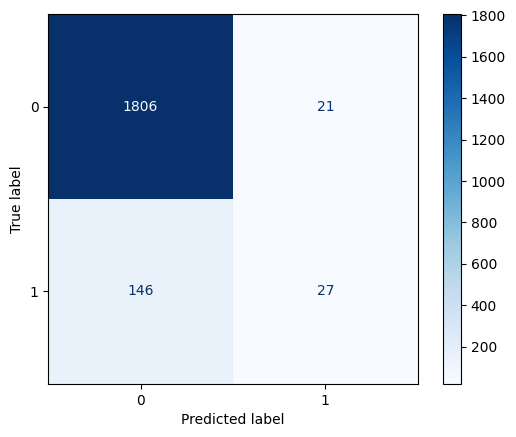

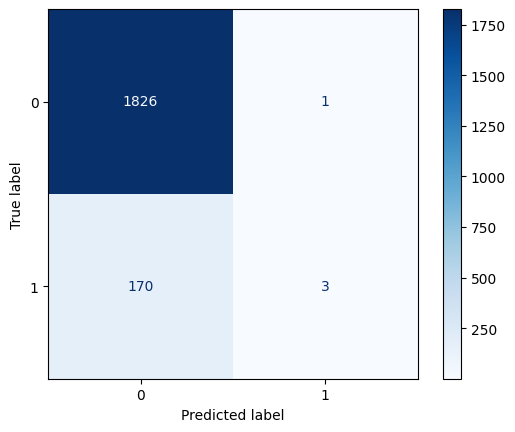

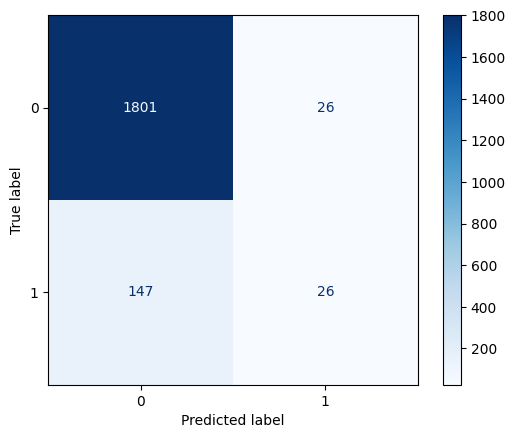

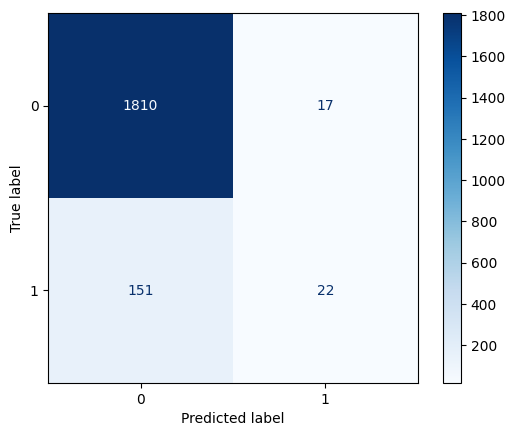

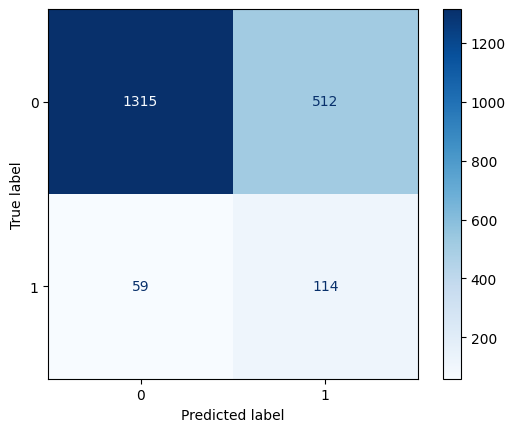

<Figure size 1000x600 with 0 Axes>

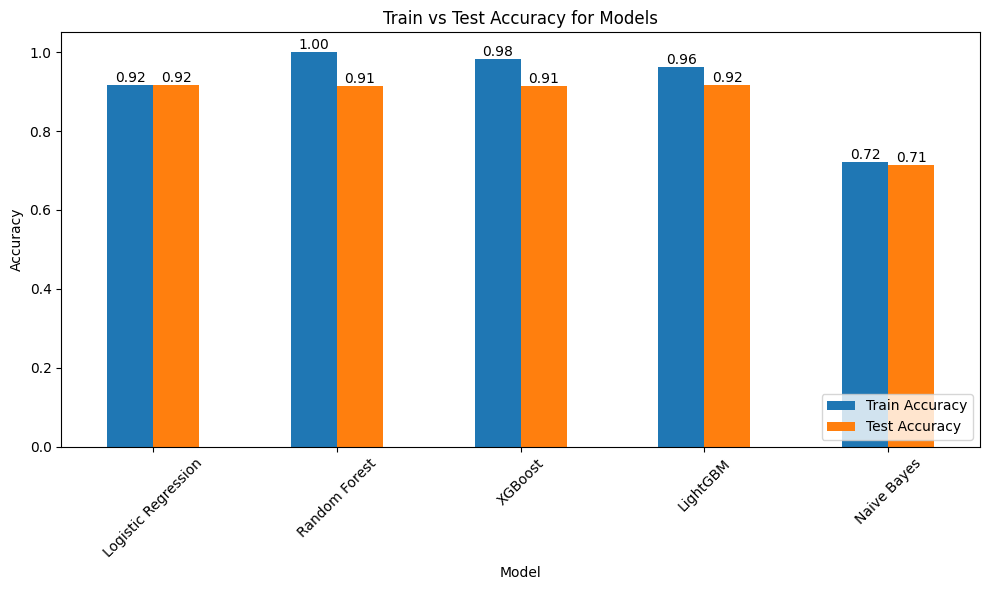

In [ ]:
results = []

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # AUC-ROC for binary classification
    auc_roc = None
    if len(set(y_test)) == 2:  # Check if binary classification
        y_test_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
        if y_test_prob is not None:
            auc_roc = roc_auc_score(y_test, y_test_prob)

    # Classification metrics
    classification_metrics = classification_report(
        y_test, y_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "AUC-ROC": auc_roc,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print classification report
    print(f"\n{name} - Classification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} - Confusion Matrix (Test Set):")
    print(cm)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Display results
print("\nModel Performance:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

#CSL

In [ ]:
# Imbalance Ratio(IR) = Nmj/Nmin

Nmaj = class_counts[0]  # Count for class '0'
Nmin = class_counts[1]  # Count for class '1'

# Compute Imbalance Ratio (IR)
IR = Nmaj / Nmin

print(f"Majority Class (Nmaj): {Nmaj}")
print(f"Minority Class (Nmin): {Nmin}")
print(f"Imbalance Ratio (IR): {IR:.2f}")

Majority Class (Nmaj): 9146
Minority Class (Nmin): 854
Imbalance Ratio (IR): 10.71



Training Logistic Regression...

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      1827
           1       0.25      0.82      0.38       173

    accuracy                           0.77      2000
   macro avg       0.61      0.79      0.62      2000
weighted avg       0.91      0.77      0.82      2000


Logistic Regression - Confusion Matrix:


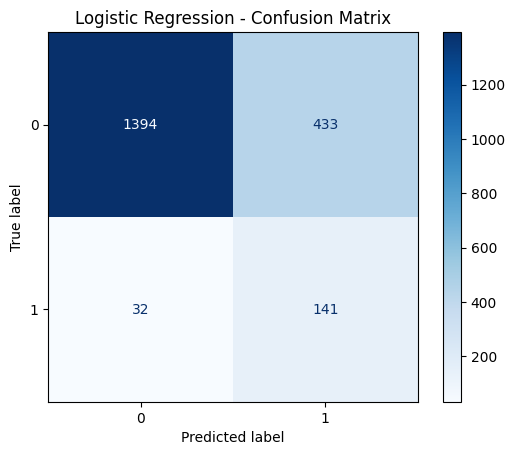


Training Random Forest...

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1827
           1       0.28      0.55      0.37       173

    accuracy                           0.84      2000
   macro avg       0.62      0.71      0.64      2000
weighted avg       0.90      0.84      0.86      2000


Random Forest - Confusion Matrix:


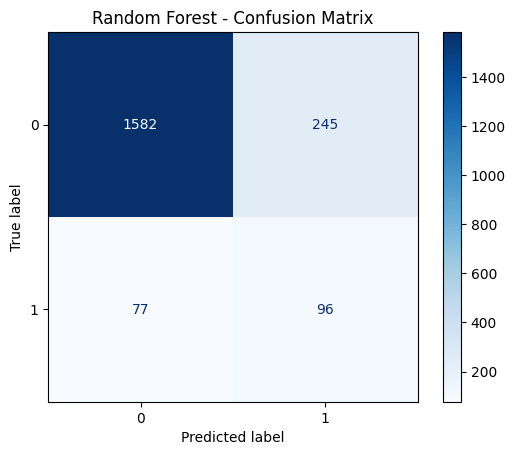


Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:45:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1827
           1       0.32      0.40      0.36       173

    accuracy                           0.87      2000
   macro avg       0.63      0.66      0.64      2000
weighted avg       0.89      0.87      0.88      2000


XGBoost - Confusion Matrix:


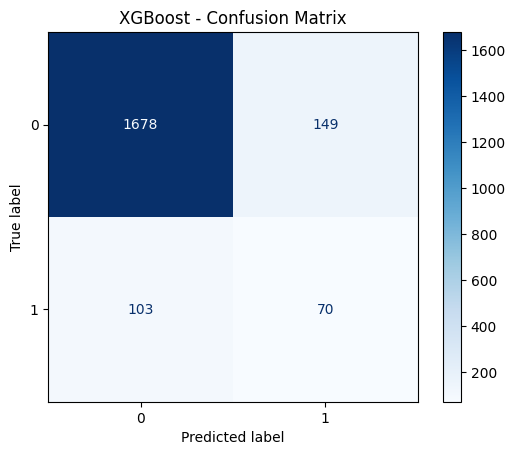


Training LightGBM...
[LightGBM] [Info] Number of positive: 681, number of negative: 7319
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 901
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 112
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085125 -> initscore=-2.374667
[LightGBM] [Info] Start training from score -2.374667


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



LightGBM - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1827
           1       0.29      0.61      0.39       173

    accuracy                           0.84      2000
   macro avg       0.62      0.73      0.65      2000
weighted avg       0.90      0.84      0.86      2000


LightGBM - Confusion Matrix:


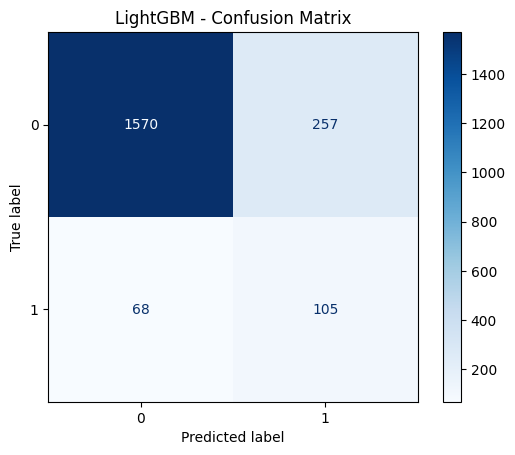


Training Naive Bayes...

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.66      0.78      1827
           1       0.16      0.70      0.27       173

    accuracy                           0.67      2000
   macro avg       0.56      0.68      0.52      2000
weighted avg       0.89      0.67      0.74      2000


Naive Bayes - Confusion Matrix:


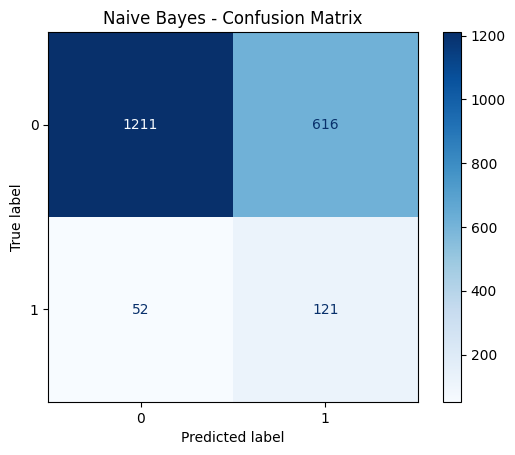


Weighted Results:
                 Model  Train Accuracy  Test Accuracy   AUC-ROC  \
0  Logistic Regression        0.762375         0.7675  0.859323   
1        Random Forest        0.890875         0.8390  0.853239   
2              XGBoost        0.980125         0.8740  0.811814   
3             LightGBM        0.914000         0.8375  0.841033   
4          Naive Bayes        0.675500         0.6660  0.738527   

   F1-Score (Class 0)  F1-Score (Class 1)  Recall (Class 0)  Recall (Class 1)  
0            0.857055            0.377510          0.762999          0.815029  
1            0.907631            0.373541          0.865900          0.554913  
2            0.930155            0.357143          0.918446          0.404624  
3            0.906205            0.392523          0.859332          0.606936  
4            0.783819            0.265934          0.662835          0.699422  


<Figure size 1000x600 with 0 Axes>

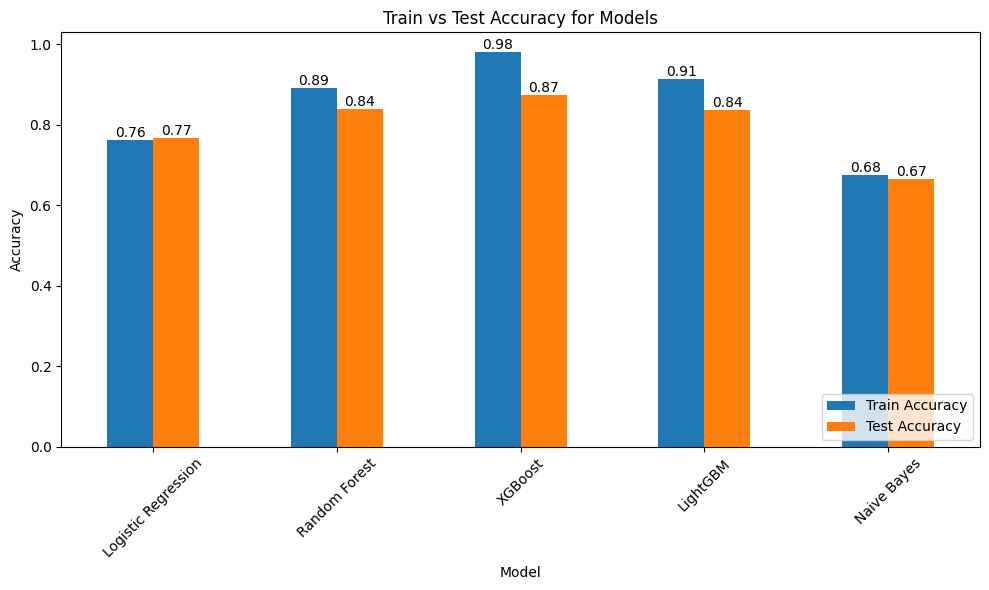

In [ ]:
# Define class weights for models that support it
class_weights = {0: 1, 1: IR}  # Logistic Regression and Random Forest

# Define weighted models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10, class_weight=class_weights),
    "Random Forest": RandomForestClassifier(random_state=10, class_weight=class_weights,max_depth=10, n_estimators=130),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=IR, random_state=10),
    "LightGBM": LGBMClassifier(scale_pos_weight=IR, random_state=10),
    "Naive Bayes": GaussianNB()  # Naive Bayes doesn't use IR directly
}

# Train and evaluate each model
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    if name == "Naive Bayes":
        sample_weights = [class_weights[y] for y in y_train]
        model.fit(X_train_scaled, y_train, sample_weight=sample_weights)
    else:
        model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # AUC-ROC
    auc_roc = None
    if len(set(y_test)) == 2:
        y_test_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
        if y_test_prob is not None:
            auc_roc = roc_auc_score(y_test, y_test_prob)

    # Classification metrics
    classification_metrics = classification_report(
        y_test, y_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "AUC-ROC": auc_roc,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print metrics
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_test_pred))
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} - Confusion Matrix:")
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\nWeighted Results:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


Training Logistic Regression...

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      1827
           1       0.24      0.81      0.38       173

    accuracy                           0.77      2000
   macro avg       0.61      0.79      0.62      2000
weighted avg       0.91      0.77      0.82      2000


Logistic Regression - Confusion Matrix:


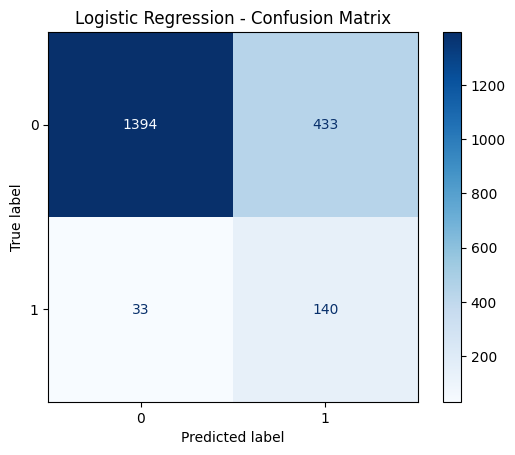


Training Random Forest...

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1827
           1       0.28      0.56      0.38       173

    accuracy                           0.84      2000
   macro avg       0.62      0.71      0.64      2000
weighted avg       0.90      0.84      0.86      2000


Random Forest - Confusion Matrix:


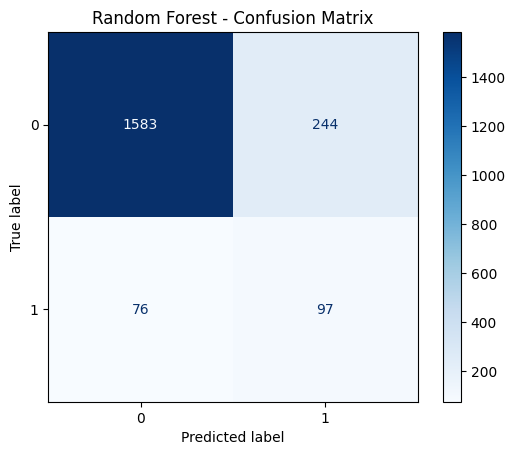


Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:45:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1827
           1       0.32      0.40      0.36       173

    accuracy                           0.87      2000
   macro avg       0.63      0.66      0.64      2000
weighted avg       0.89      0.87      0.88      2000


XGBoost - Confusion Matrix:


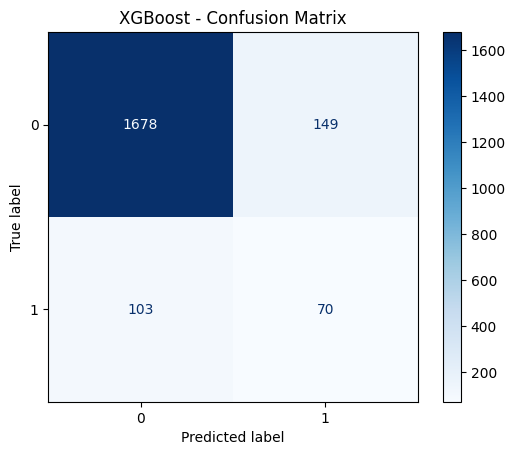


Training LightGBM...
[LightGBM] [Info] Number of positive: 681, number of negative: 7319
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 901
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 112
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085125 -> initscore=-2.374667
[LightGBM] [Info] Start training from score -2.374667


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



LightGBM - Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1827
           1       1.00      0.02      0.03       173

    accuracy                           0.92      2000
   macro avg       0.96      0.51      0.49      2000
weighted avg       0.92      0.92      0.88      2000


LightGBM - Confusion Matrix:


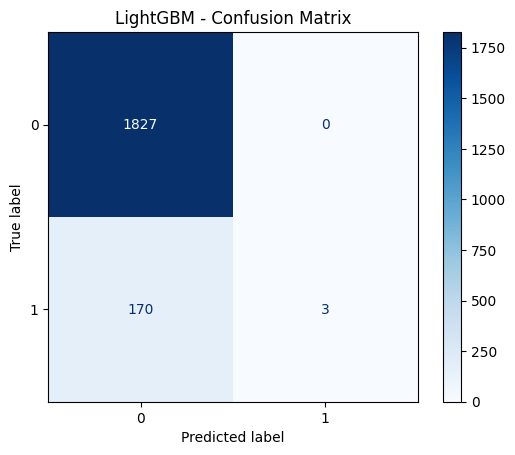


Training Naive Bayes...

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.66      0.78      1827
           1       0.16      0.70      0.27       173

    accuracy                           0.67      2000
   macro avg       0.56      0.68      0.52      2000
weighted avg       0.89      0.67      0.74      2000


Naive Bayes - Confusion Matrix:


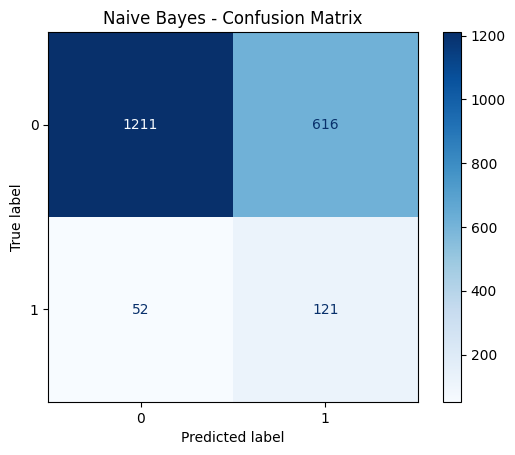


Weighted Results:
                 Model  Train Accuracy  Test Accuracy   AUC-ROC  \
0  Logistic Regression        0.761750          0.767  0.859364   
1        Random Forest        0.892125          0.840  0.853410   
2              XGBoost        0.980125          0.874  0.811814   
3             LightGBM        0.926250          0.915  0.838729   
4          Naive Bayes        0.675500          0.666  0.738527   

   F1-Score (Class 0)  F1-Score (Class 1)  Recall (Class 0)  Recall (Class 1)  
0            0.856792            0.375335          0.762999          0.809249  
1            0.908204            0.377432          0.866448          0.560694  
2            0.930155            0.357143          0.918446          0.404624  
3            0.955544            0.034091          1.000000          0.017341  
4            0.783819            0.265934          0.662835          0.699422  


<Figure size 1000x600 with 0 Axes>

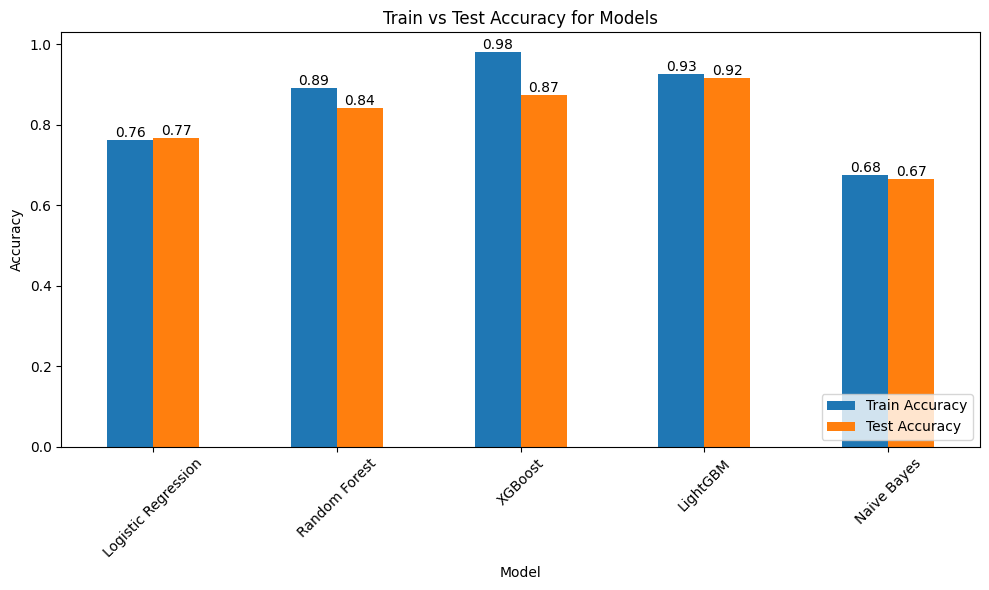

In [ ]:
# Define class weights for models that support it
class_weights2 = {1: 1, 0: (1/IR)}  # Logistic Regression and Random Forest

# Define weighted models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10, class_weight=class_weights2),
    "Random Forest": RandomForestClassifier(random_state=10, class_weight=class_weights2,max_depth=10, n_estimators=130),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=IR, random_state=10),
    "LightGBM": LGBMClassifier(scale_pos_weight=1/IR, random_state=10),
    "Naive Bayes": GaussianNB()  # Naive Bayes doesn't use IR directly
}

# Train and evaluate each model
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    if name == "Naive Bayes":
        sample_weights2 = [class_weights2[y] for y in y_train]
        model.fit(X_train_scaled, y_train, sample_weight=sample_weights2)
    else:
        model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # AUC-ROC
    auc_roc = None
    if len(set(y_test)) == 2:
        y_test_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
        if y_test_prob is not None:
            auc_roc = roc_auc_score(y_test, y_test_prob)

    # Classification metrics
    classification_metrics = classification_report(
        y_test, y_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "AUC-ROC": auc_roc,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print metrics
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_test_pred))
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} - Confusion Matrix:")
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\nWeighted Results:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [ ]:
!pip install imbalanced-ensemble
import imbens
from imbens.ensemble.base import sort_dict_by_key

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 744.6/744.6 kB 10.9 MB/s eta 0:00:00


In [ ]:
cost_matrices = {}

def plot_cost_matrix(cost_matrix, title: str, **kwargs):
    ax = sns.heatmap(data=cost_matrix, **kwargs)
    ax.set_ylabel("Predicted Label")
    ax.set_xlabel("Ground Truth")
    ax.set_title(title)

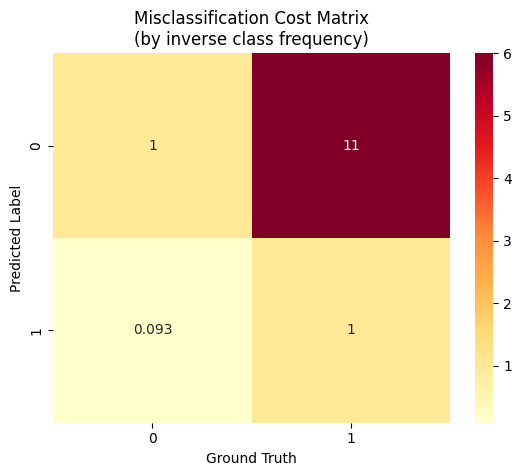

In [ ]:
# Default Cost Matrix

'''init_kwargs = {
    "n_estimators": 50,
    "learning_rate": 1.0,
    "random_state": 10,
}'''

adacost_clf = imbens.ensemble.AdaCostClassifier()
adacost_clf.fit(X_train_scaled, y_train)

cost_matrix1 = adacost_clf.cost_matrix_

title = "Misclassification Cost Matrix\n(by inverse class frequency)"
cost_matrices[title] = adacost_clf.cost_matrix_
plot_cost_matrix(adacost_clf.cost_matrix_, title, annot=True, cmap='YlOrRd', vmax=6)

In [ ]:
cost_matrix1

array([[ 1.        , 10.74743025],
       [ 0.0930455 ,  1.        ]])

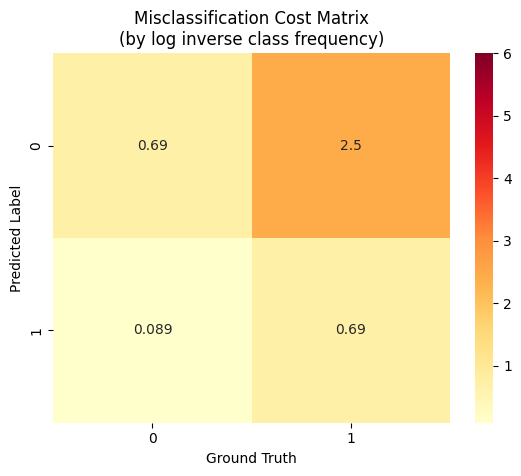

In [ ]:
# log1p-inverse Cost Matrix
adacost_clf.fit(
    X_train_scaled,
    y_train,
    cost_matrix='log1p-inverse',  # set cost matrix by log inverse class frequency
)

cost_matrix2 =adacost_clf.cost_matrix_


title = "Misclassification Cost Matrix\n(by log inverse class frequency)"
cost_matrices[title] = adacost_clf.cost_matrix_
plot_cost_matrix(adacost_clf.cost_matrix_, title, annot=True, cmap='YlOrRd', vmax=6)

In [ ]:
cost_matrix2

array([[0.69314718, 2.46363451],
       [0.08896784, 0.69314718]])

In [ ]:
10.74743025 / (10.74743025+0.0930455)

0.9914168434904713

In [ ]:
0.0930455 / (10.74743025+0.0930455)

0.008583156509528652

In [ ]:
#  w0 = c0/ (c1+c0)
#  w1 = c1 /(c1+c0)
# These weights are proportional to the misclassification costs and sum to 1, ensuring that higher misclassification costs lead to higher corresponding class weights

class_weights_licf = {0:0.034853779712300276, 1:0.9651462202876997}
class_weights_icf = {0:0.008583156509528652, 1:0.9914168434904713}


Training Logistic Regression...

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.37      0.53      1827
           1       0.13      0.99      0.23       173

    accuracy                           0.42      2000
   macro avg       0.56      0.68      0.38      2000
weighted avg       0.92      0.42      0.51      2000


Logistic Regression - Confusion Matrix:


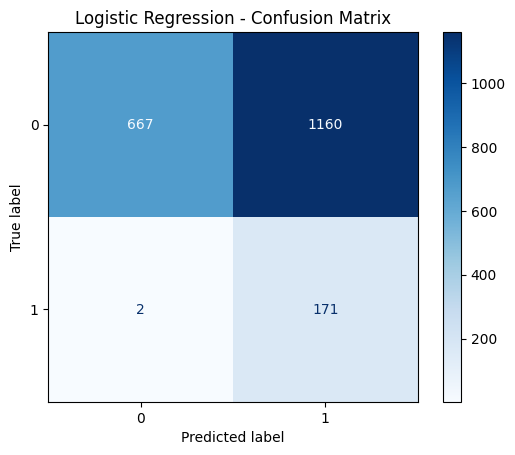


Training Random Forest...

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.41      0.59      1827
           1       0.14      0.97      0.24       173

    accuracy                           0.46      2000
   macro avg       0.56      0.69      0.41      2000
weighted avg       0.92      0.46      0.55      2000


Random Forest - Confusion Matrix:


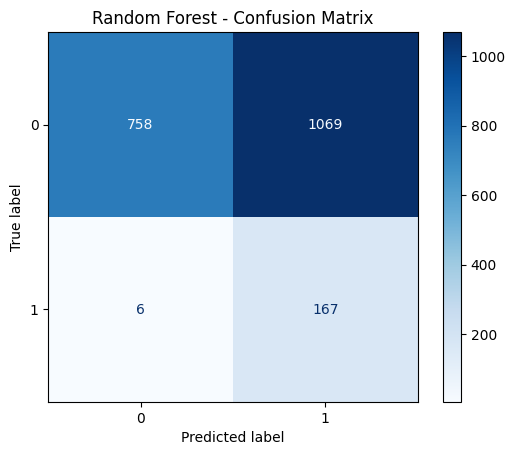


Training XGBoost...

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1827
           1       0.22      0.54      0.32       173

    accuracy                           0.80      2000
   macro avg       0.59      0.68      0.60      2000
weighted avg       0.89      0.80      0.83      2000


XGBoost - Confusion Matrix:


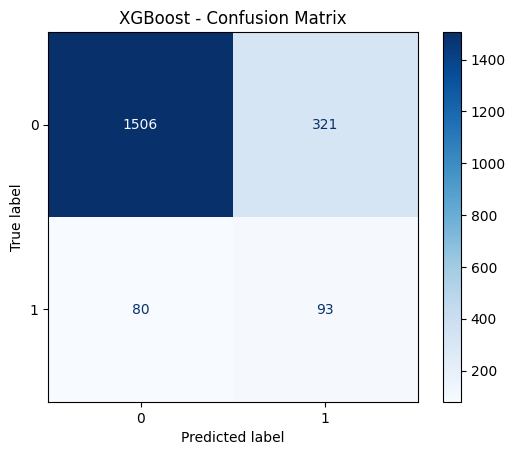


Training LightGBM...
[LightGBM] [Info] Number of positive: 681, number of negative: 7319
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 901
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 112
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085125 -> initscore=-2.374667
[LightGBM] [Info] Start training from score -2.374667

LightGBM - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.71      0.82      1827
           1       0.21      0.83      0.34       173

    accuracy                           0.72      2000
   macro avg       0.60      0.77      0.58      2000
weighted avg       0.91      0.72      0.78      2000


LightGBM - Confusion Matrix:


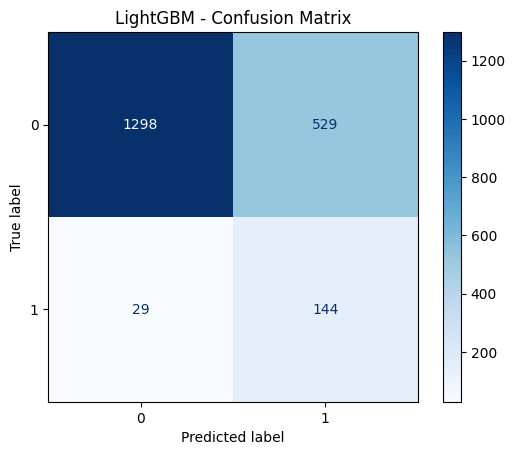


Training Naive Bayes...

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.61      0.75      1827
           1       0.15      0.74      0.25       173

    accuracy                           0.62      2000
   macro avg       0.56      0.68      0.50      2000
weighted avg       0.89      0.62      0.70      2000


Naive Bayes - Confusion Matrix:


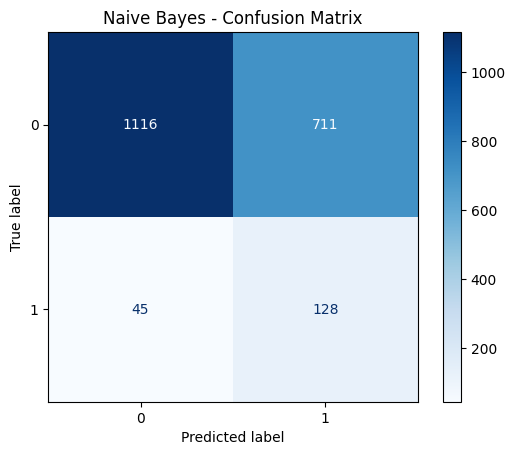


Weighted Results:
                 Model  Train Accuracy  Test Accuracy   AUC-ROC  \
0  Logistic Regression         0.41150         0.4190  0.855944   
1        Random Forest         0.46325         0.4625  0.812710   
2              XGBoost         0.91675         0.7995  0.787098   
3             LightGBM         0.76800         0.7210  0.843485   
4          Naive Bayes         0.63325         0.6220  0.738310   

   F1-Score (Class 0)  F1-Score (Class 1)  Recall (Class 0)  Recall (Class 1)  
0            0.534455            0.227394          0.365079          0.988439  
1            0.585102            0.237048          0.414888          0.965318  
2            0.882508            0.316865          0.824302          0.537572  
3            0.823082            0.340426          0.710454          0.832370  
4            0.746988            0.252964          0.610837          0.739884  


<Figure size 1000x600 with 0 Axes>

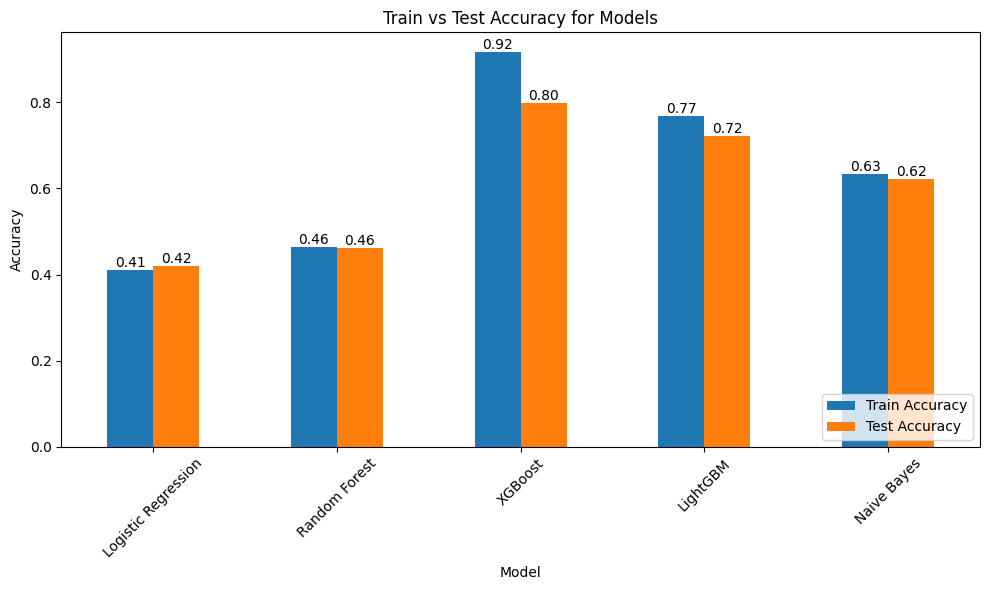

In [ ]:
IR1 = 10.74743025/0.0930455

# Define weighted models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10, class_weight=class_weights_icf),
    "Random Forest": RandomForestClassifier(random_state=10, class_weight=class_weights_icf,max_depth=10, n_estimators=130),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=IR1, random_state=10),
    "LightGBM": LGBMClassifier(scale_pos_weight=IR1, random_state=10),
    "Naive Bayes": GaussianNB()  # Naive Bayes doesn't use IR directly
}

# Train and evaluate each model
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    if name == "Naive Bayes":
        sample_weights = [class_weights_icf[y] for y in y_train]
        model.fit(X_train_scaled, y_train, sample_weight=sample_weights)
    else:
        model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # AUC-ROC
    auc_roc = None
    if len(set(y_test)) == 2:
        y_test_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
        if y_test_prob is not None:
            auc_roc = roc_auc_score(y_test, y_test_prob)

    # Classification metrics
    classification_metrics = classification_report(
        y_test, y_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "AUC-ROC": auc_roc,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print metrics
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_test_pred))
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} - Confusion Matrix:")
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\nWeighted Results:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()



Training Logistic Regression...

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.59      0.74      1827
           1       0.17      0.90      0.29       173

    accuracy                           0.62      2000
   macro avg       0.58      0.75      0.52      2000
weighted avg       0.91      0.62      0.70      2000


Logistic Regression - Confusion Matrix:


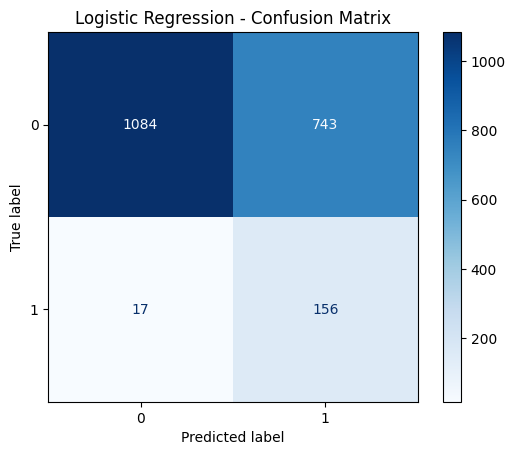


Training Random Forest...

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.68      0.81      1827
           1       0.21      0.87      0.34       173

    accuracy                           0.70      2000
   macro avg       0.60      0.78      0.57      2000
weighted avg       0.92      0.70      0.77      2000


Random Forest - Confusion Matrix:


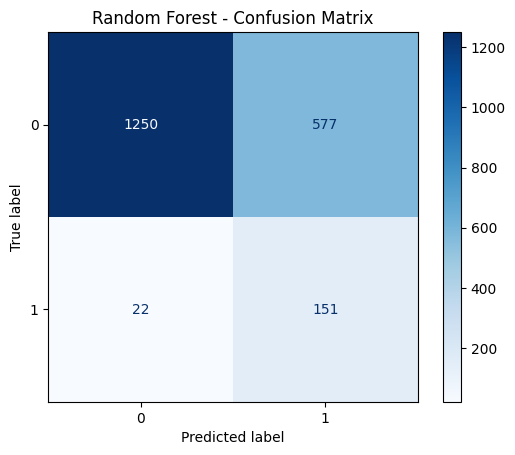


Training XGBoost...

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1827
           1       0.24      0.41      0.30       173

    accuracy                           0.84      2000
   macro avg       0.59      0.64      0.61      2000
weighted avg       0.88      0.84      0.86      2000


XGBoost - Confusion Matrix:


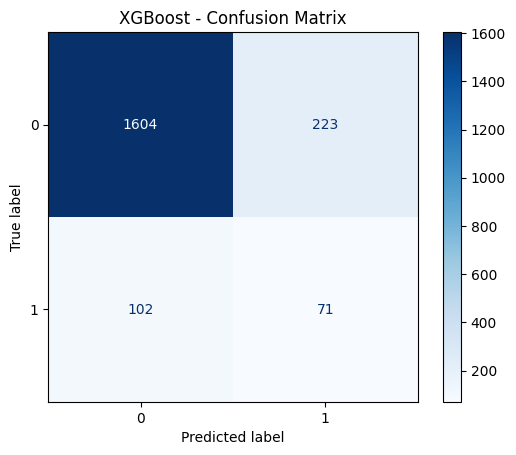


Training LightGBM...
[LightGBM] [Info] Number of positive: 681, number of negative: 7319
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 901
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 112
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085125 -> initscore=-2.374667
[LightGBM] [Info] Start training from score -2.374667

LightGBM - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      1827
           1       0.23      0.69      0.34       173

    accuracy                           0.77      2000
   macro avg       0.59      0.73      0.60      2000
weighted avg       0.90      0.77      0.81      2000


LightGBM - Confusion Matrix:


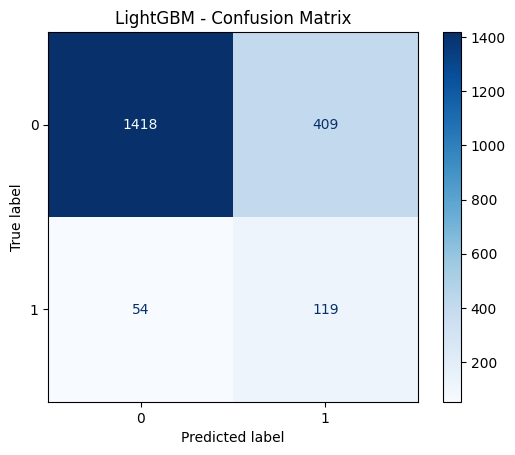


Training Naive Bayes...

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.64      0.77      1827
           1       0.16      0.72      0.26       173

    accuracy                           0.65      2000
   macro avg       0.56      0.68      0.52      2000
weighted avg       0.89      0.65      0.73      2000


Naive Bayes - Confusion Matrix:


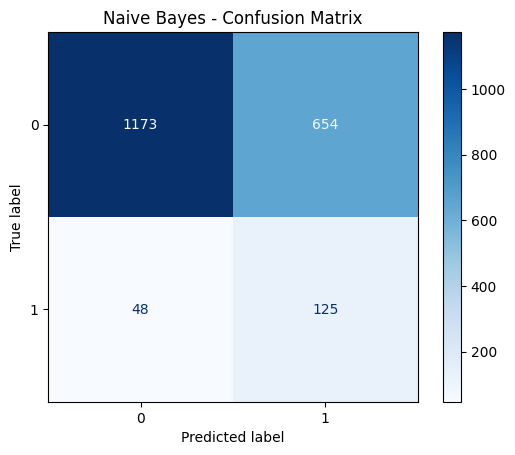


Weighted Results:
                 Model  Train Accuracy  Test Accuracy   AUC-ROC  \
0  Logistic Regression        0.614125         0.6200  0.857829   
1        Random Forest        0.728000         0.7005  0.838100   
2              XGBoost        0.956625         0.8375  0.776284   
3             LightGBM        0.841625         0.7685  0.825928   
4          Naive Bayes        0.657000         0.6490  0.738448   

   F1-Score (Class 0)  F1-Score (Class 1)  Recall (Class 0)  Recall (Class 1)  
0            0.740437            0.291045          0.593322          0.901734  
1            0.806712            0.335183          0.684182          0.872832  
2            0.908010            0.304069          0.877942          0.410405  
3            0.859654            0.339515          0.776136          0.687861  
4            0.769685            0.262605          0.642036          0.722543  


<Figure size 1000x600 with 0 Axes>

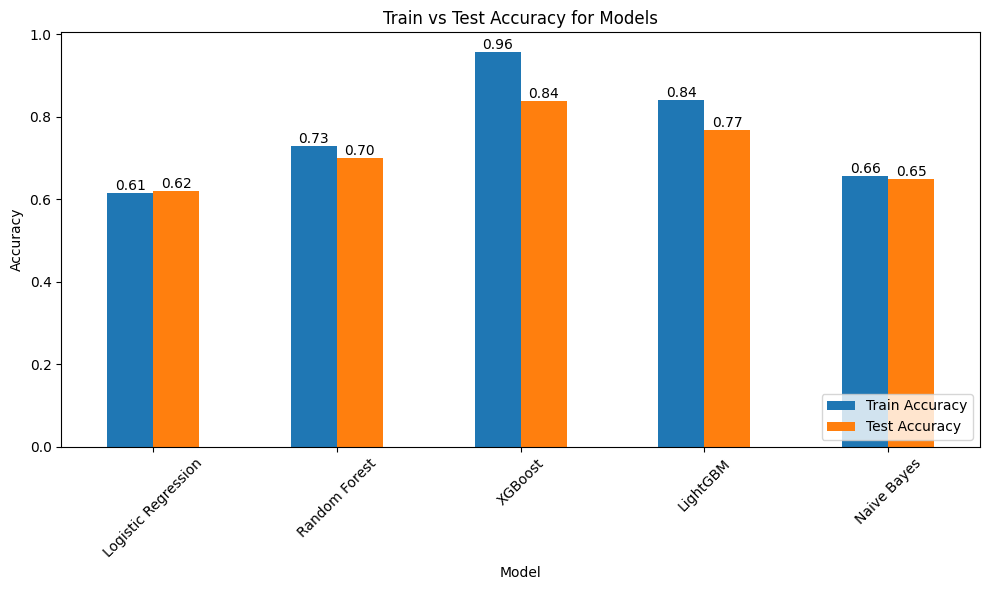

In [ ]:
IR2 = 2.46363451/0.08896784

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10, class_weight=class_weights_licf),
    "Random Forest": RandomForestClassifier(random_state=10, class_weight=class_weights_licf,max_depth=10, n_estimators=130),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=IR2, random_state=10),
    "LightGBM": LGBMClassifier(scale_pos_weight=IR2, random_state=10),
    "Naive Bayes": GaussianNB()  # Naive Bayes doesn't use IR directly
}

# Train and evaluate each model
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    if name == "Naive Bayes":
        sample_weights = [class_weights_licf[y] for y in y_train]
        model.fit(X_train_scaled, y_train, sample_weight=sample_weights)
    else:
        model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # AUC-ROC
    auc_roc = None
    if len(set(y_test)) == 2:
        y_test_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
        if y_test_prob is not None:
            auc_roc = roc_auc_score(y_test, y_test_prob)

    # Classification metrics
    classification_metrics = classification_report(
        y_test, y_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "AUC-ROC": auc_roc,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print metrics
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_test_pred))
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} - Confusion Matrix:")
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\nWeighted Results:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


Training Balanced Random Forest...

Balanced Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1827
           1       0.26      0.72      0.39       173

    accuracy                           0.80      2000
   macro avg       0.62      0.76      0.63      2000
weighted avg       0.91      0.80      0.84      2000


Balanced Random Forest - Confusion Matrix:


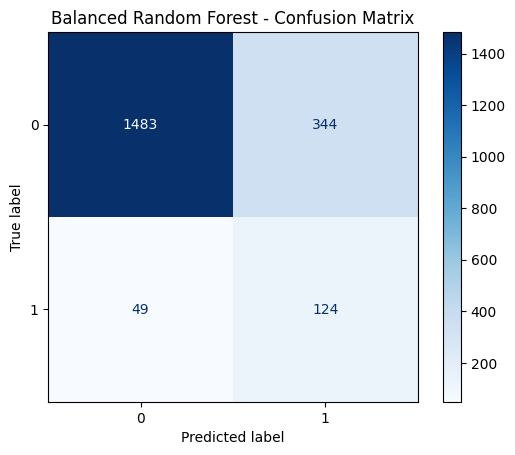


Training Easy Ensemble Classifier...

Easy Ensemble Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.74      0.85      1827
           1       0.24      0.84      0.37       173

    accuracy                           0.75      2000
   macro avg       0.61      0.79      0.61      2000
weighted avg       0.92      0.75      0.80      2000


Easy Ensemble Classifier - Confusion Matrix:


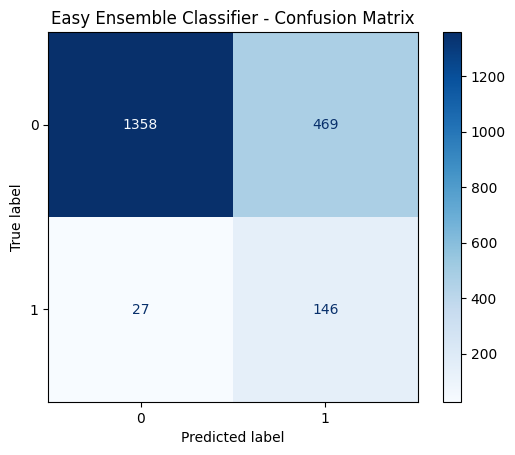


Model Performance Results:
                      Model  Train Accuracy  Test Accuracy  \
0    Balanced Random Forest        0.865625         0.8035   
1  Easy Ensemble Classifier        0.744750         0.7520   

   F1-Score (Class 0)  F1-Score (Class 1)  Recall (Class 0)  Recall (Class 1)  
0            0.883001            0.386895          0.811713          0.716763  
1            0.845579            0.370558          0.743295          0.843931  


<Figure size 1000x600 with 0 Axes>

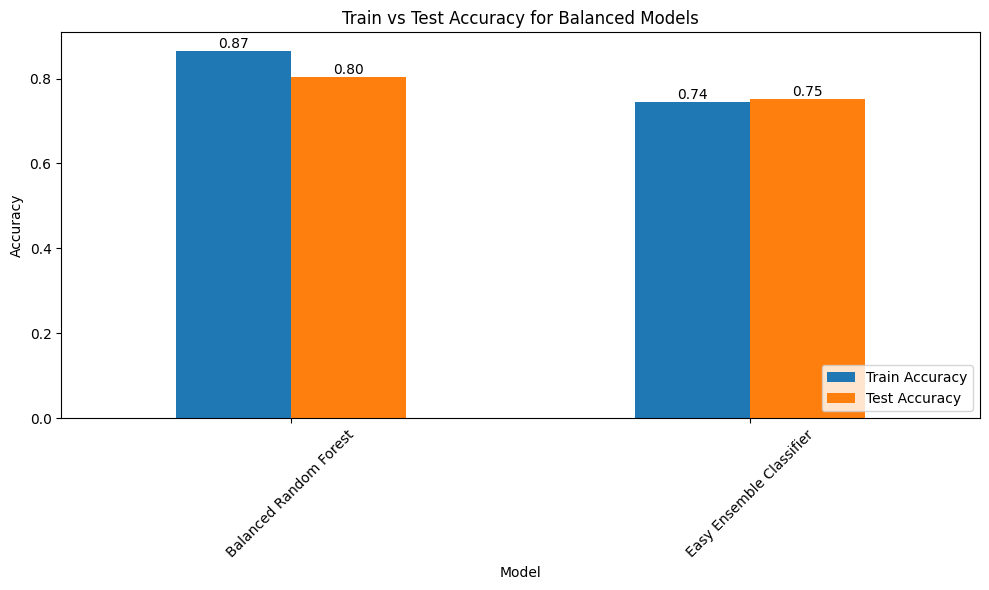

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

# Train and evaluate the models
models = {
    "Balanced Random Forest": BalancedRandomForestClassifier(random_state=42),
    "Easy Ensemble Classifier": EasyEnsembleClassifier(random_state=42)
}

results = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Classification metrics
    classification_metrics = classification_report(
        y_test, y_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print metrics
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_test_pred))
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} - Confusion Matrix:")
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\nModel Performance Results:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Balanced Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Hyperparameter tuning

In [ ]:
!pip install optuna
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.0 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
def objective_rf(trial):
    # Define the hyperparameter space
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 5, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
    }

    # Define class weights
    class_weights = {0: 1, 1: 10.71}  # Replace `IR` with your imbalance ratio

    # Define the model
    model = RandomForestClassifier(**param, class_weight=class_weights, random_state=10)

    # Perform cross-validation
    score = cross_val_score(model, X_train_scaled, y_train, scoring="roc_auc", cv=2, n_jobs=-1)
    return score.mean()

# Run the optimization
study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective_rf, n_trials=30)

[I 2025-01-23 18:48:45,807] A new study created in memory with name: no-name-fd0967cf-c3cd-460f-a919-527a055b69ee
[I 2025-01-23 18:48:53,603] Trial 0 finished with value: 0.8294641837239767 and parameters: {'n_estimators': 159, 'max_depth': 23, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.8294641837239767.
[I 2025-01-23 18:48:57,141] Trial 1 finished with value: 0.8140837771939491 and parameters: {'n_estimators': 113, 'max_depth': 5, 'min_samples_split': 19, 'min_samples_leaf': 18, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.8294641837239767.
[I 2025-01-23 18:49:11,490] Trial 2 finished with value: 0.8168704592935145 and parameters: {'n_estimators': 280, 'max_depth': 18, 'min_samples_split': 16, 'min_samples_leaf': 11, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.8294641837239767.
[I 2025-01-23 18:49:12,733] Trial 3 finished with value: 0.8296924665754628 

In [ ]:
# Best parameters and final evaluation
best_params_rf = study_rf.best_params
clf_rf = RandomForestClassifier(**best_params_rf, class_weight={0: 1, 1: IR}, random_state=10)
clf_rf.fit(X_train_scaled, y_train)
y_pred_rf = clf_rf.predict(X_test_scaled)
y_prob_rf = clf_rf.predict_proba(X_test_scaled)[:, 1]

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest AUC:", roc_auc_score(y_test, y_prob_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1827
           1       0.28      0.61      0.38       173

    accuracy                           0.83      2000
   macro avg       0.62      0.73      0.64      2000
weighted avg       0.90      0.83      0.86      2000

Random Forest AUC: 0.8606515624653954


In [ ]:
import xgboost as xgb

# Define the imbalance ratio (IR)
IR = 10.71  # Replace this with your actual imbalance ratio

def objective_xgb(trial):
    """
    Objective function for XGBoost hyperparameter optimization using Optuna.
    """
    # Define the hyperparameter search space
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_child_weight": trial.suggest_float("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "objective": "binary:logistic",
        "eval_metric": "auc",  # Evaluation metric for classification
        "seed": 10,  # Ensure reproducibility
    }

    # Convert the training data into XGBoost's DMatrix format
    dtrain = xgb.DMatrix(X_train_scaled, label=y_train)

    # Perform cross-validation using native XGBoost
    cv_results = xgb.cv(
        params=params,
        dtrain=dtrain,
        num_boost_round=500,  # Upper limit for boosting rounds
        nfold=5,
        metrics="auc",
        as_pandas=True,
        seed=10,
        early_stopping_rounds=20  # Stops if no improvement in 20 rounds
    )

    # Return the mean AUC from the last iteration of cross-validation
    return cv_results["test-auc-mean"].iloc[-1]

# Set a fixed seed for Optuna's sampler
sampler = optuna.samplers.TPESampler(seed=10)

# Create an Optuna study for maximization
study_xgb = optuna.create_study(direction="maximize", sampler=sampler)

# Run the optimization process
study_xgb.optimize(objective_xgb, n_trials=50)

# Output the best parameters and the corresponding AUC score
print("Best parameters for XGBoost:", study_xgb.best_params)
print("Best AUC for XGBoost:", study_xgb.best_value)

[I 2025-01-23 18:56:43,643] A new study created in memory with name: no-name-6ac47046-30d5-45c7-82f7-91fd60aa6b84
[I 2025-01-23 18:56:47,998] Trial 0 finished with value: 0.8329626259337559 and parameters: {'learning_rate': 0.23368298654735634, 'max_depth': 3, 'min_child_weight': 6.702834114336479, 'subsample': 0.8744019412693059, 'colsample_bytree': 0.7492535061512953}. Best is trial 0 with value: 0.8329626259337559.
[I 2025-01-23 18:56:54,649] Trial 1 finished with value: 0.8352282216974087 and parameters: {'learning_rate': 0.07519102720394581, 'max_depth': 4, 'min_child_weight': 7.8447764097906285, 'subsample': 0.5845554182812678, 'colsample_bytree': 0.5441699070870052}. Best is trial 1 with value: 0.8352282216974087.
[I 2025-01-23 18:56:59,638] Trial 2 finished with value: 0.8161430464068727 and parameters: {'learning_rate': 0.2087543473266612, 'max_depth': 10, 'min_child_weight': 1.03553439695123, 'subsample': 0.7560961316928883, 'colsample_bytree': 0.9063104808260567}. Best is tr

Best parameters for XGBoost: {'learning_rate': 0.04133419213671302, 'max_depth': 3, 'min_child_weight': 6.3313297346782145, 'subsample': 0.634256931016316, 'colsample_bytree': 0.6875199603576434}
Best AUC for XGBoost: 0.837453021208094


In [ ]:
# Add static parameters and class weights to the best parameters for the final model
best_params_xgb = study_xgb.best_params
best_params_xgb.update({
    "objective": "binary:logistic",
    "eval_metric": "auc",  # AUC for evaluation
    "random_state": 10  # Ensure reproducibility
})

# Convert the training data to DMatrix with class weights
dtrain_final = xgb.DMatrix(X_train_scaled, label=y_train, weight=[1 if y == 0 else IR for y in y_train])

# Train the final model using the best parameters
clf_xgb = xgb.train(
    params=best_params_xgb,
    dtrain=dtrain_final,
    num_boost_round=500,
    early_stopping_rounds=20,  # Stops if no improvement in 20 rounds
    evals=[(dtrain_final, "train")]
)

# Convert the test data to DMatrix
dtest_final = xgb.DMatrix(X_test_scaled)

# Make predictions on the test set
y_prob_xgb = clf_xgb.predict(dtest_final)  # Probabilities for class 1
y_pred_xgb = (y_prob_xgb > 0.5).astype(int)  # Apply a 0.5 threshold

# Evaluate the model
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost AUC:", roc_auc_score(y_test, y_prob_xgb))

[0]	train-auc:0.78928
[1]	train-auc:0.80148
[2]	train-auc:0.82155
[3]	train-auc:0.82798
[4]	train-auc:0.82882
[5]	train-auc:0.82915
[6]	train-auc:0.82938
[7]	train-auc:0.83257
[8]	train-auc:0.83271
[9]	train-auc:0.83355
[10]	train-auc:0.83429
[11]	train-auc:0.83448
[12]	train-auc:0.83490
[13]	train-auc:0.83702
[14]	train-auc:0.83872
[15]	train-auc:0.83895
[16]	train-auc:0.83954
[17]	train-auc:0.84063
[18]	train-auc:0.84102
[19]	train-auc:0.84088
[20]	train-auc:0.84075
[21]	train-auc:0.84056
[22]	train-auc:0.84114
[23]	train-auc:0.84217
[24]	train-auc:0.84246
[25]	train-auc:0.84278
[26]	train-auc:0.84299
[27]	train-auc:0.84316
[28]	train-auc:0.84361
[29]	train-auc:0.84376
[30]	train-auc:0.84439
[31]	train-auc:0.84447
[32]	train-auc:0.84498
[33]	train-auc:0.84590
[34]	train-auc:0.84604
[35]	train-auc:0.84646
[36]	train-auc:0.84702
[37]	train-auc:0.84785
[38]	train-auc:0.84832
[39]	train-auc:0.84848
[40]	train-auc:0.84901
[41]	train-auc:0.84914
[42]	train-auc:0.84946
[43]	train-auc:0.8497

# DL Algorithm

In [ ]:
data_copy2

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Texas,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.68,113.40,40.35,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
1,Wisconsin,Female,Good,2.0,5.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,1.73,104.33,34.97,Yes,Yes,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
2,Idaho,Male,Poor,7.0,10.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,...,1.73,104.33,34.97,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
3,Iowa,Female,Good,20.0,10.0,Within past year (anytime less than 12 months ...,No,8.0,All,Yes,...,1.68,127.01,45.19,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
4,South Dakota,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.60,49.90,19.49,Yes,No,Yes,No,"Yes, received Tdap",No,Tested positive using home test without a heal...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,South Dakota,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,1 to 5,Yes,...,1.83,108.86,32.55,Yes,No,Yes,Yes,"Yes, received Tdap",No,Yes
9996,North Dakota,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,10.0,None of them,No,...,1.52,58.97,25.39,No,No,No,No,"Yes, received tetanus shot, but not Tdap",No,No
9997,Washington,Female,Very good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.60,58.97,23.03,Yes,Yes,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
9998,Virginia,Female,Good,0.0,4.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.70,105.23,36.34,No,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No


In [ ]:
data_copy2['HeartConditionBinary'] = ((data_copy2['HadHeartAttack'] == 'Yes') | (data_copy2['HadAngina'] == 'Yes')).astype(int)
data_copy2 = data_copy2.drop(['HadHeartAttack','HadAngina'],axis=1)
data_copy2

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadStroke,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartConditionBinary
0,Texas,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,113.40,40.35,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,0
1,Wisconsin,Female,Good,2.0,5.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,104.33,34.97,Yes,Yes,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No,0
2,Idaho,Male,Poor,7.0,10.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,...,104.33,34.97,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,1
3,Iowa,Female,Good,20.0,10.0,Within past year (anytime less than 12 months ...,No,8.0,All,No,...,127.01,45.19,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,1
4,South Dakota,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,49.90,19.49,Yes,No,Yes,No,"Yes, received Tdap",No,Tested positive using home test without a heal...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,South Dakota,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,1 to 5,No,...,108.86,32.55,Yes,No,Yes,Yes,"Yes, received Tdap",No,Yes,1
9996,North Dakota,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,10.0,None of them,Yes,...,58.97,25.39,No,No,No,No,"Yes, received tetanus shot, but not Tdap",No,No,0
9997,Washington,Female,Very good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,58.97,23.03,Yes,Yes,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No,0
9998,Virginia,Female,Good,0.0,4.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,No,...,105.23,36.34,No,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No,1


In [ ]:
numerical_cols2 = data_copy2.select_dtypes(include=['float64','number']).columns
numerical_data2 = data_copy2[numerical_cols]
numerical_data2

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
0,0.0,0.0,8.0,1.68,113.40,40.35
1,2.0,5.0,8.0,1.73,104.33,34.97
2,7.0,10.0,6.0,1.73,104.33,34.97
3,20.0,10.0,8.0,1.68,127.01,45.19
4,0.0,0.0,7.0,1.60,49.90,19.49
...,...,...,...,...,...,...
9995,0.0,0.0,8.0,1.83,108.86,32.55
9996,0.0,0.0,10.0,1.52,58.97,25.39
9997,0.0,3.0,6.0,1.60,58.97,23.03
9998,0.0,4.0,5.0,1.70,105.23,36.34


In [ ]:
categorical_cols2 = data_copy2.select_dtypes(include=['object','category']).columns

#1)TabNET

In [ ]:
!pip install pytorch-tabnet
from sklearn.preprocessing import LabelEncoder
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
# Step 1: Encode categorical features
label_encoders = {}
cat_idxs = []
cat_dims = []

for col in categorical_cols2:
    le = LabelEncoder()
    data_copy2[col] = le.fit_transform(data_copy2[col].astype(str))  # Ensure data is string for LabelEncoder
    label_encoders[col] = le
    cat_idxs.append(data_copy2.columns.get_loc(col))  # Store column index
    cat_dims.append(len(le.classes_))  # Store number of unique classes

In [ ]:
# Step 2: Separate features and target
target = "HeartConditionBinary"
features = [col for col in data_copy2.columns if col != target]

X = data_copy2[features].values
y = data_copy2[target].values

# Step 3: Train-Validation-Test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=10)

In [ ]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (7000, 38) (7000,)
Validation set shape: (1500, 38) (1500,)
Test set shape: (1500, 38) (1500,)


In [ ]:
# Step 4: Confirm data types
print(f"X_train: {type(X_train)}, dtype: {X_train.dtype}")
print(f"X_valid: {type(X_valid)}, dtype: {X_valid.dtype}")
print(f"y_train: {type(y_train)}, dtype: {y_train.dtype}")
print(f"y_valid: {type(y_valid)}, dtype: {y_valid.dtype}")
print(f"X_test: {type(X_test)}, dtype: {X_test.dtype}")
print(f"y_test: {type(y_test)}, dtype: {y_test.dtype}")

X_train: <class 'numpy.ndarray'>, dtype: float64
X_valid: <class 'numpy.ndarray'>, dtype: float64
y_train: <class 'numpy.ndarray'>, dtype: int64
y_valid: <class 'numpy.ndarray'>, dtype: int64
X_test: <class 'numpy.ndarray'>, dtype: float64
y_test: <class 'numpy.ndarray'>, dtype: int64


In [ ]:
weight_options = [
    {0: 1, 1: 10.71},
    {0: (1/10.71), 1: 1},
    {0:0.008583156509528652, 1:0.9914168434904713},
    {0:0.034853779712300276, 1:0.9651462202876997}
]

#class_weights_licf = {0:0.034853779712300276, 1:0.9651462202876997}
#class_weights_icf = {0:0.008583156509528652, 1:0.9914168434904713}

In [ ]:
from sklearn.metrics import roc_auc_score, recall_score, f1_score, accuracy_score, classification_report

results = []  # Store all results

for i, class_weights in enumerate(weight_options):
    print(f"\n### Training with Weight Set {i+1}: {class_weights}")

    # Initialize TabNet
    clf = TabNetClassifier(
        cat_idxs=cat_idxs,
        cat_dims=cat_dims,
        cat_emb_dim=5,  # Fixed for now
        optimizer_fn=torch.optim.Adam,
        optimizer_params={"lr": 0.01},  # Fixed for now
        scheduler_params={"step_size": 50, "gamma": 0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type="entmax",
        device_name="cuda" if torch.cuda.is_available() else "cpu",
    )

    # Train the model with all datasets in eval_set
    clf.fit(
        X_train=X_train,
        y_train=y_train,
        eval_set=[(X_valid, y_valid), (X_test, y_test), (X_train, y_train)],
        eval_name=["valid", "test", "train"],
        eval_metric=["auc"],
        max_epochs=40,
        patience=30,
        batch_size=256,
        virtual_batch_size=128,
        weights=class_weights,
        num_workers=0,
        drop_last=False,
    )

    # Extract AUC from training history
    valid_auc = max(clf.history["valid_auc"])  # Best validation AUC
    test_auc = max(clf.history["test_auc"])  # Best test AUC
    train_auc = max(clf.history["train_auc"])  # Best train AUC

    # Predictions for validation
    preds_valid = clf.predict(X_valid)
    preds_valid_proba = clf.predict_proba(X_valid)[:, 1]  # For AUC calculation

    # Predictions for test
    preds_test = clf.predict(X_test)
    preds_test_proba = clf.predict_proba(X_test)[:, 1]

    # Predictions for train
    preds_train = clf.predict(X_train)
    preds_train_proba = clf.predict_proba(X_train)[:, 1]

    # Compute additional metrics for Train
    train_accuracy = accuracy_score(y_train, preds_train)
    train_recall = recall_score(y_train, preds_train, average=None)
    train_f1 = f1_score(y_train, preds_train, average=None)

    # Compute additional metrics for Validation
    valid_accuracy = accuracy_score(y_valid, preds_valid)
    valid_recall = recall_score(y_valid, preds_valid, average=None)
    valid_f1 = f1_score(y_valid, preds_valid, average=None)

    # Compute additional metrics for Test
    test_accuracy = accuracy_score(y_test, preds_test)
    test_recall = recall_score(y_test, preds_test, average=None)
    test_f1 = f1_score(y_test, preds_test, average=None)

    # Compute confusion matrices
    train_conf_matrix = confusion_matrix(y_train, preds_train)
    valid_conf_matrix = confusion_matrix(y_valid, preds_valid)
    test_conf_matrix = confusion_matrix(y_test, preds_test)

    # Compute classification reports
    train_classification_report = classification_report(y_train, preds_train, output_dict=True)
    valid_classification_report = classification_report(y_valid, preds_valid, output_dict=True)
    test_classification_report = classification_report(y_test, preds_test, output_dict=True)

    # Store results
    results.append({
        "Weight Set": i + 1,
        "Class Weights": class_weights,

        "Train AUC": train_auc,
        "Train Accuracy": train_accuracy,
        "Train Recall (class 0 & 1)": train_recall.tolist(),
        "Train F1-score (class 0 & 1)": train_f1.tolist(),
        "Train Confusion Matrix": train_conf_matrix.tolist(),
        "Train Classification Report": train_classification_report,

        "Validation AUC": valid_auc,
        "Validation Accuracy": valid_accuracy,
        "Validation Recall (class 0 & 1)": valid_recall.tolist(),
        "Validation F1-score (class 0 & 1)": valid_f1.tolist(),
        "Validation Confusion Matrix": valid_conf_matrix.tolist(),
        "Validation Classification Report": valid_classification_report,

        "Test AUC": test_auc,
        "Test Accuracy": test_accuracy,
        "Test Recall (class 0 & 1)": test_recall.tolist(),
        "Test F1-score (class 0 & 1)": test_f1.tolist(),
        "Test Confusion Matrix": test_conf_matrix.tolist(),
        "Test Classification Report": test_classification_report,
    })

    print("\n📌 **Performance Summary for Weight Set", i+1, "**")
    print(f"Train AUC: {train_auc:.4f}, Validation AUC: {valid_auc:.4f}, Test AUC: {test_auc:.4f}")
    print(f"Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {valid_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

    print("\n🔹 **Train Classification Report**:")
    print(classification_report(y_train, preds_train))
    print("\nTrain Confusion Matrix:\n", train_conf_matrix)

    print("\n🔹 **Validation Classification Report**:")
    print(classification_report(y_valid, preds_valid))
    print("\nValidation Confusion Matrix:\n", valid_conf_matrix)

    print("\n🔹 **Test Classification Report**:")
    print(classification_report(y_test, preds_test))
    print("\nTest Confusion Matrix:\n", test_conf_matrix)



### Training with Weight Set 1: {0: 1, 1: 10.71}


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.85999 | valid_auc: 0.56499 | test_auc: 0.54097 | train_auc: 0.5893  |  0:00:04s
epoch 1  | loss: 0.62398 | valid_auc: 0.76722 | test_auc: 0.77138 | train_auc: 0.76828 |  0:00:07s
epoch 2  | loss: 0.5575  | valid_auc: 0.78616 | test_auc: 0.79982 | train_auc: 0.80041 |  0:00:09s
epoch 3  | loss: 0.49909 | valid_auc: 0.79048 | test_auc: 0.80917 | train_auc: 0.82791 |  0:00:13s
epoch 4  | loss: 0.47452 | valid_auc: 0.80315 | test_auc: 0.81135 | train_auc: 0.84251 |  0:00:15s
epoch 5  | loss: 0.46099 | valid_auc: 0.78939 | test_auc: 0.80947 | train_auc: 0.8535  |  0:00:16s
epoch 6  | loss: 0.46144 | valid_auc: 0.76658 | test_auc: 0.79997 | train_auc: 0.85392 |  0:00:18s
epoch 7  | loss: 0.42416 | valid_auc: 0.7704  | test_auc: 0.78945 | train_auc: 0.8715  |  0:00:19s
epoch 8  | loss: 0.41918 | valid_auc: 0.77515 | test_auc: 0.79496 | train_auc: 0.87723 |  0:00:20s
epoch 9  | loss: 0.38863 | valid_auc: 0.78359 | test_auc: 0.80766 | train_auc: 0.89662 |  0:00:21s
epoch 10 |

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



📌 **Performance Summary for Weight Set 1 **
Train AUC: 0.9809, Validation AUC: 0.8061, Test AUC: 0.8113
Train Accuracy: 0.9141, Validation Accuracy: 0.8253, Test Accuracy: 0.8287
Train Recall: [0.90699126 0.99155405], Validation Recall: [0.85672938 0.45762712], Test Recall: [0.86578171 0.47916667]
Train F1-score: [0.95083845 0.66140845], Validation F1-score: [0.90038023 0.29189189], Test F1-score: [0.90134357 0.34936709]

### Training with Weight Set 2: {0: 0.09337068160597571, 1: 1}


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.85999 | valid_auc: 0.56499 | test_auc: 0.54097 | train_auc: 0.5893  |  0:00:01s
epoch 1  | loss: 0.62398 | valid_auc: 0.76722 | test_auc: 0.77138 | train_auc: 0.76828 |  0:00:03s
epoch 2  | loss: 0.5575  | valid_auc: 0.78616 | test_auc: 0.79982 | train_auc: 0.80041 |  0:00:04s
epoch 3  | loss: 0.49909 | valid_auc: 0.79048 | test_auc: 0.80917 | train_auc: 0.82791 |  0:00:05s
epoch 4  | loss: 0.47452 | valid_auc: 0.80315 | test_auc: 0.81135 | train_auc: 0.84251 |  0:00:07s
epoch 5  | loss: 0.46099 | valid_auc: 0.78939 | test_auc: 0.80947 | train_auc: 0.8535  |  0:00:08s
epoch 6  | loss: 0.46144 | valid_auc: 0.76658 | test_auc: 0.79997 | train_auc: 0.85392 |  0:00:09s
epoch 7  | loss: 0.42416 | valid_auc: 0.7704  | test_auc: 0.78945 | train_auc: 0.8715  |  0:00:10s
epoch 8  | loss: 0.41918 | valid_auc: 0.77515 | test_auc: 0.79496 | train_auc: 0.87723 |  0:00:12s
epoch 9  | loss: 0.38863 | valid_auc: 0.78359 | test_auc: 0.80766 | train_auc: 0.89662 |  0:00:14s
epoch 10 |

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



📌 **Performance Summary for Weight Set 2 **
Train AUC: 0.9809, Validation AUC: 0.8061, Test AUC: 0.8113
Train Accuracy: 0.9141, Validation Accuracy: 0.8253, Test Accuracy: 0.8287
Train Recall: [0.90699126 0.99155405], Validation Recall: [0.85672938 0.45762712], Test Recall: [0.86578171 0.47916667]
Train F1-score: [0.95083845 0.66140845], Validation F1-score: [0.90038023 0.29189189], Test F1-score: [0.90134357 0.34936709]

### Training with Weight Set 3: {0: 0.008583156509528652, 1: 0.9914168434904713}


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.69874 | valid_auc: 0.62665 | test_auc: 0.67153 | train_auc: 0.63715 |  0:00:01s
epoch 1  | loss: 0.27663 | valid_auc: 0.7126  | test_auc: 0.7648  | train_auc: 0.72714 |  0:00:02s
epoch 2  | loss: 0.25699 | valid_auc: 0.73737 | test_auc: 0.78894 | train_auc: 0.76858 |  0:00:04s
epoch 3  | loss: 0.2506  | valid_auc: 0.76981 | test_auc: 0.81323 | train_auc: 0.7825  |  0:00:05s
epoch 4  | loss: 0.24019 | valid_auc: 0.78349 | test_auc: 0.78826 | train_auc: 0.79483 |  0:00:06s
epoch 5  | loss: 0.22724 | valid_auc: 0.78979 | test_auc: 0.79881 | train_auc: 0.812   |  0:00:08s
epoch 6  | loss: 0.20791 | valid_auc: 0.80826 | test_auc: 0.79047 | train_auc: 0.8196  |  0:00:09s
epoch 7  | loss: 0.21497 | valid_auc: 0.80735 | test_auc: 0.79474 | train_auc: 0.82692 |  0:00:11s
epoch 8  | loss: 0.1993  | valid_auc: 0.83132 | test_auc: 0.80207 | train_auc: 0.84156 |  0:00:13s
epoch 9  | loss: 0.20712 | valid_auc: 0.81497 | test_auc: 0.78603 | train_auc: 0.84403 |  0:00:14s
epoch 10 |

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



📌 **Performance Summary for Weight Set 3 **
Train AUC: 0.9338, Validation AUC: 0.8313, Test AUC: 0.8294
Train Accuracy: 0.7227, Validation Accuracy: 0.6873, Test Accuracy: 0.7173
Train Recall: [0.69709738 1.        ], Validation Recall: [0.67655572 0.81355932], Test Recall: [0.7079646  0.80555556]
Train F1-score: [0.82151724 0.37888   ], Validation F1-score: [0.79948696 0.29046899], Test F1-score: [0.81911263 0.35365854]

### Training with Weight Set 4: {0: 0.034853779712300276, 1: 0.9651462202876997}


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.87499 | valid_auc: 0.51731 | test_auc: 0.54074 | train_auc: 0.56739 |  0:00:01s
epoch 1  | loss: 0.55448 | valid_auc: 0.71556 | test_auc: 0.74533 | train_auc: 0.735   |  0:00:02s
epoch 2  | loss: 0.49494 | valid_auc: 0.76423 | test_auc: 0.77972 | train_auc: 0.76548 |  0:00:03s
epoch 3  | loss: 0.46448 | valid_auc: 0.762   | test_auc: 0.76789 | train_auc: 0.78506 |  0:00:05s
epoch 4  | loss: 0.43308 | valid_auc: 0.78451 | test_auc: 0.78491 | train_auc: 0.80981 |  0:00:07s
epoch 5  | loss: 0.41519 | valid_auc: 0.77725 | test_auc: 0.80161 | train_auc: 0.83232 |  0:00:08s
epoch 6  | loss: 0.3931  | valid_auc: 0.78048 | test_auc: 0.7965  | train_auc: 0.84791 |  0:00:10s
epoch 7  | loss: 0.36603 | valid_auc: 0.77442 | test_auc: 0.79807 | train_auc: 0.8605  |  0:00:11s
epoch 8  | loss: 0.3439  | valid_auc: 0.78322 | test_auc: 0.79941 | train_auc: 0.87713 |  0:00:12s
epoch 9  | loss: 0.32936 | valid_auc: 0.76816 | test_auc: 0.78084 | train_auc: 0.89182 |  0:00:14s
epoch 10 |

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



📌 **Performance Summary for Weight Set 4 **
Train AUC: 0.9793, Validation AUC: 0.7845, Test AUC: 0.8016
Train Accuracy: 0.8996, Validation Accuracy: 0.8013, Test Accuracy: 0.8107
Train Recall: [0.89060549 0.99662162], Validation Recall: [0.83212735 0.44067797], Test Recall: [0.83702065 0.5625    ]
Train F1-score: [0.94198234 0.62665959], Validation F1-score: [0.88529638 0.25870647], Test F1-score: [0.88880188 0.3632287 ]


In [ ]:
df_results = pd.DataFrame(results)
print("\n### 📊 Final Model Comparison ###")
print(df_results)


### 📊 Final Model Comparison ###
   Weight Set                                     Class Weights  Train AUC  \
0           1                                  {0: 1, 1: 10.71}   0.980907   
1           2                    {0: 0.09337068160597571, 1: 1}   0.980907   
2           3  {0: 0.008583156509528652, 1: 0.9914168434904713}   0.933774   
3           4  {0: 0.034853779712300276, 1: 0.9651462202876997}   0.979321   

   Train Accuracy                Train Recall (class 0 & 1)  \
0        0.914143  [0.9069912609238452, 0.9915540540540541]   
1        0.914143  [0.9069912609238452, 0.9915540540540541]   
2        0.722714                 [0.6970973782771536, 1.0]   
3        0.899571  [0.8906054931335831, 0.9966216216216216]   

               Train F1-score (class 0 & 1)  Validation AUC  \
0   [0.950838445807771, 0.6614084507042254]        0.806097   
1   [0.950838445807771, 0.6614084507042254]        0.806097   
2             [0.8215172413793104, 0.37888]        0.831324   
3  [0.9

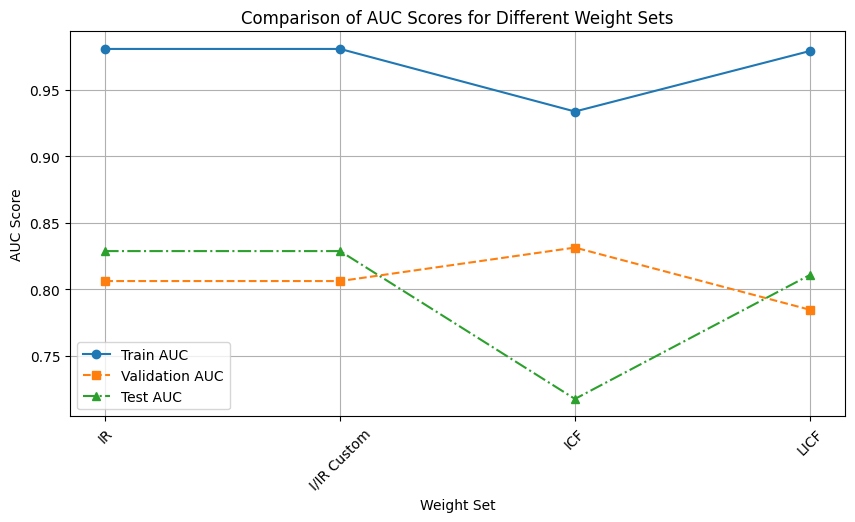

In [ ]:
# Define the weight sets for labeling
weight_labels = ["IR", "I/IR Custom", "ICF", "LICF"]

# Example results dataframe (Replace this with actual values from your results)
df_results = pd.DataFrame({
    "Weight Set": weight_labels,
    "Train AUC": [0.980907, 0.980907, 0.933774,0.979321 ],
    "Validation AUC": [0.806097  , 0.806097, 0.831324, 0.784512],
    "Test AUC": [0.828667 , 0.828667 ,0.717333, 0.810667]
})

# Plot AUC comparison for Train, Test, and Validation
plt.figure(figsize=(10, 5))
plt.plot(df_results["Weight Set"], df_results["Train AUC"], marker='o', linestyle='-', label="Train AUC")
plt.plot(df_results["Weight Set"], df_results["Validation AUC"], marker='s', linestyle='--', label="Validation AUC")
plt.plot(df_results["Weight Set"], df_results["Test AUC"], marker='^', linestyle='-.', label="Test AUC")

# Customize plot
plt.xlabel("Weight Set")
plt.ylabel("AUC Score")
plt.title("Comparison of AUC Scores for Different Weight Sets")
plt.legend()
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
######################################################################################################

In [ ]:
def objective(trial):
    # Suggest hyperparameters
    cat_emb_dim = trial.suggest_int("cat_emb_dim", 1, 10)
    lr = trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True)
    gamma = trial.suggest_float("gamma", 0.5, 0.99)
    step_size = trial.suggest_int("step_size", 10, 100)
    mask_type = trial.suggest_categorical("mask_type", ["entmax", "sparsemax"])
    batch_size = trial.suggest_categorical("batch_size", [128, 256, 512])

    # Initialize TabNet with the suggested hyperparameters
    clf1 = TabNetClassifier(
        cat_idxs=cat_idxs,
        cat_dims=cat_dims,
        cat_emb_dim=cat_emb_dim,
        optimizer_fn=torch.optim.Adam,
        optimizer_params={"lr": lr},
        scheduler_params={"step_size": step_size, "gamma": gamma},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type=mask_type,
        device_name="cuda" if torch.cuda.is_available() else "cpu",
    )

    # Train the model
    clf1.fit(
        X_train=X_train,
        y_train=y_train,
        eval_set=[(X_valid, y_valid)],
        eval_name=["valid"],
        eval_metric=["auc"],
        max_epochs=100,  # Maximum number of epochs for tuning
        patience=40,  # Early stopping
        batch_size=batch_size,
        virtual_batch_size=128,
        weights={0: 1, 1: 10.38},  # Adjust weights for imbalance
        num_workers=0,
        drop_last=False,
    )

    # Evaluate on the validation set
    preds_valid = clf1.predict_proba(X_valid)[:, 1]  # Get probabilities for the positive class
    valid_auc = roc_auc_score(y_valid, preds_valid)  # Compute AUC

    return valid_auc  # Optuna will maximize this value

In [ ]:
# Create an Optuna study and optimize
study = optuna.create_study(direction="maximize")  # Maximize AUC
study.optimize(objective, n_trials=1)  # Perform 40 trials

# Output the best hyperparameters and score
print("Best hyperparameters:", study.best_params)
print("Best validation AUC:", study.best_value)

[I 2025-01-23 19:01:56,450] A new study created in memory with name: no-name-ecf23aa7-10f1-4e54-83f5-8410ad1b56e0


epoch 0  | loss: 0.76552 | valid_auc: 0.64702 |  0:00:07s
epoch 1  | loss: 0.63232 | valid_auc: 0.74566 |  0:00:09s
epoch 2  | loss: 0.58655 | valid_auc: 0.73987 |  0:00:10s
epoch 3  | loss: 0.5545  | valid_auc: 0.75782 |  0:00:12s
epoch 4  | loss: 0.52335 | valid_auc: 0.76697 |  0:00:13s
epoch 5  | loss: 0.51773 | valid_auc: 0.79077 |  0:00:15s
epoch 6  | loss: 0.48269 | valid_auc: 0.7734  |  0:00:17s
epoch 7  | loss: 0.46539 | valid_auc: 0.79472 |  0:00:19s
epoch 8  | loss: 0.45091 | valid_auc: 0.77158 |  0:00:21s
epoch 9  | loss: 0.44701 | valid_auc: 0.78877 |  0:00:22s
epoch 10 | loss: 0.42916 | valid_auc: 0.79772 |  0:00:24s
epoch 11 | loss: 0.43097 | valid_auc: 0.7896  |  0:00:25s
epoch 12 | loss: 0.40333 | valid_auc: 0.79621 |  0:00:27s
epoch 13 | loss: 0.38142 | valid_auc: 0.79527 |  0:00:28s
epoch 14 | loss: 0.37143 | valid_auc: 0.80336 |  0:00:30s
epoch 15 | loss: 0.35145 | valid_auc: 0.80469 |  0:00:32s
epoch 16 | loss: 0.33801 | valid_auc: 0.79374 |  0:00:34s
epoch 17 | los

[I 2025-01-23 19:03:47,241] Trial 0 finished with value: 0.8046892246559886 and parameters: {'cat_emb_dim': 5, 'learning_rate': 0.01220921508615995, 'gamma': 0.7076380522367046, 'step_size': 81, 'mask_type': 'sparsemax', 'batch_size': 128}. Best is trial 0 with value: 0.8046892246559886.


Best hyperparameters: {'cat_emb_dim': 5, 'learning_rate': 0.01220921508615995, 'gamma': 0.7076380522367046, 'step_size': 81, 'mask_type': 'sparsemax', 'batch_size': 128}
Best validation AUC: 0.8046892246559886


In [ ]:
best_params = study.best_params

clf_best = TabNetClassifier(
    cat_idxs=cat_idxs,
    cat_dims=cat_dims,
    cat_emb_dim=best_params["cat_emb_dim"],
    optimizer_fn=torch.optim.Adam,
    optimizer_params={
        "lr": best_params["learning_rate"]
    },
    scheduler_params={
        "step_size": best_params["step_size"],
        "gamma": best_params["gamma"]
    },
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type=best_params["mask_type"],
    device_name="cuda" if torch.cuda.is_available() else "cpu",
)

clf_best.fit(
    X_train=X_train,
    y_train=y_train,
    eval_set=[(X_valid, y_valid), (X_test, y_test),(X_train, y_train)],  # Evaluate on both validation and test sets
    eval_name=["valid", "test", "train"],
    eval_metric=["auc"],
    max_epochs=40,  # Train for more epochs with the best hyperparameters
    patience=10,
    batch_size=best_params["batch_size"],
    virtual_batch_size=128,
    weights={0: 1, 1: 10.24},
    num_workers=0,
    drop_last=False,
)

# Evaluate on the test set
preds_test = clf_best.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, preds_test)
print("Test AUC:", test_auc)

epoch 0  | loss: 0.77647 | valid_auc: 0.69083 | test_auc: 0.69348 | train_auc: 0.66865 |  0:00:03s
epoch 1  | loss: 0.61707 | valid_auc: 0.73486 | test_auc: 0.73764 | train_auc: 0.71825 |  0:00:05s
epoch 2  | loss: 0.58288 | valid_auc: 0.76827 | test_auc: 0.77829 | train_auc: 0.78466 |  0:00:07s
epoch 3  | loss: 0.548   | valid_auc: 0.77367 | test_auc: 0.78137 | train_auc: 0.79249 |  0:00:10s
epoch 4  | loss: 0.54233 | valid_auc: 0.73541 | test_auc: 0.75153 | train_auc: 0.80168 |  0:00:12s
epoch 5  | loss: 0.52235 | valid_auc: 0.76394 | test_auc: 0.77413 | train_auc: 0.83738 |  0:00:14s
epoch 6  | loss: 0.50618 | valid_auc: 0.76902 | test_auc: 0.79199 | train_auc: 0.85056 |  0:00:18s
epoch 7  | loss: 0.48406 | valid_auc: 0.75102 | test_auc: 0.80261 | train_auc: 0.85612 |  0:00:20s
epoch 8  | loss: 0.46165 | valid_auc: 0.74813 | test_auc: 0.78217 | train_auc: 0.86351 |  0:00:22s
epoch 9  | loss: 0.44717 | valid_auc: 0.78203 | test_auc: 0.80131 | train_auc: 0.86993 |  0:00:24s
epoch 10 |

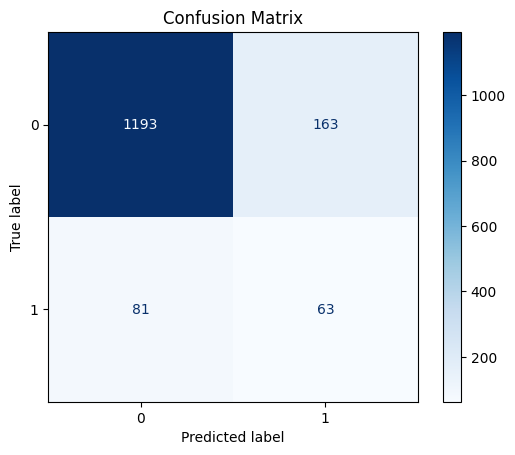

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1356
           1       0.28      0.44      0.34       144

    accuracy                           0.84      1500
   macro avg       0.61      0.66      0.62      1500
weighted avg       0.87      0.84      0.85      1500

Test AUC: 0.7486


In [ ]:
# Predictions
y_pred = clf_best.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# TEST AUC SCORE
from sklearn.metrics import roc_auc_score
y_prob = clf_best.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_prob)
print(f"Test AUC: {test_auc:.4f}")

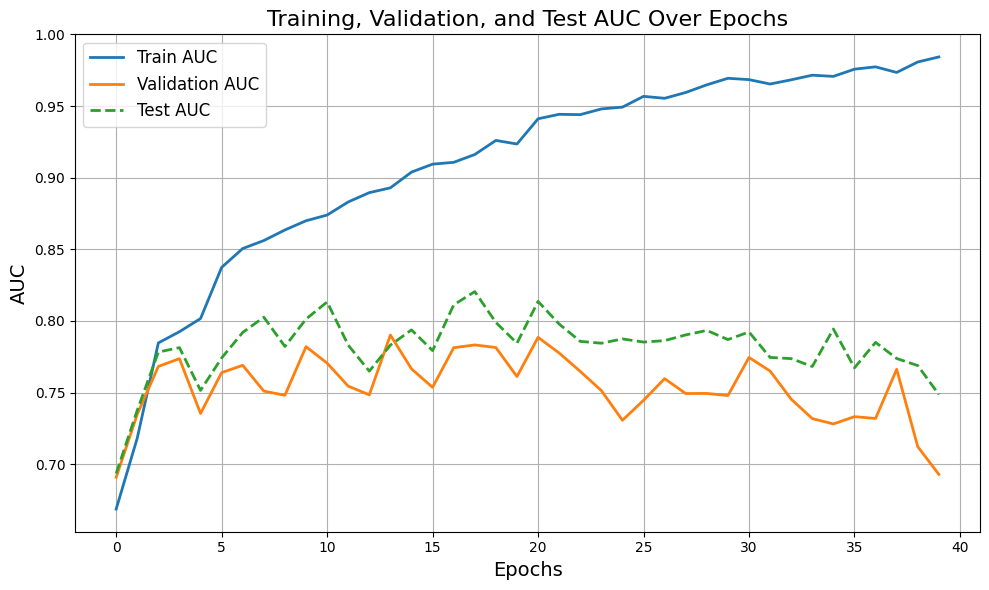

In [ ]:
# PLOT TRAINING, VALIDATION, AND TEST AUC
plt.figure(figsize=(10, 6))
plt.plot(clf_best.history["train_auc"], label="Train AUC", linewidth=2)
plt.plot(clf_best.history["valid_auc"], label="Validation AUC", linewidth=2)
plt.plot(clf_best.history["test_auc"], label="Test AUC", linewidth=2, linestyle='--')

# Plot Settings
plt.title("Training, Validation, and Test AUC Over Epochs", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("AUC", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#2)MLP

In [ ]:
data_copy3['HeartConditionBinary'] = ((data_copy3['HadHeartAttack'] == 'Yes') | (data_copy3['HadAngina'] == 'Yes')).astype(int)
data_copy3 = data_copy3.drop(['HadHeartAttack','HadAngina'],axis=1)
data_copy3

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadStroke,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartConditionBinary
0,Texas,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,113.40,40.35,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,0
1,Wisconsin,Female,Good,2.0,5.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,104.33,34.97,Yes,Yes,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No,0
2,Idaho,Male,Poor,7.0,10.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,...,104.33,34.97,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,1
3,Iowa,Female,Good,20.0,10.0,Within past year (anytime less than 12 months ...,No,8.0,All,No,...,127.01,45.19,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,1
4,South Dakota,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,49.90,19.49,Yes,No,Yes,No,"Yes, received Tdap",No,Tested positive using home test without a heal...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,South Dakota,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,1 to 5,No,...,108.86,32.55,Yes,No,Yes,Yes,"Yes, received Tdap",No,Yes,1
9996,North Dakota,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,10.0,None of them,Yes,...,58.97,25.39,No,No,No,No,"Yes, received tetanus shot, but not Tdap",No,No,0
9997,Washington,Female,Very good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,58.97,23.03,Yes,Yes,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No,0
9998,Virginia,Female,Good,0.0,4.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,No,...,105.23,36.34,No,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No,1


In [ ]:
numerical_cols3 = data_copy3.select_dtypes(include=['float64','number']).columns
categorical_cols3 = data_copy3.select_dtypes(include=['object','category']).columns

In [ ]:
nominal_features = ['State', 'RaceEthnicityCategory', 'TetanusLast10Tdap', 'CovidPos','RemovedTeeth','SmokerStatus','ECigaretteUsage','HadDiabetes']
binary_features = [
     'HadStroke', 'HadAsthma', 'HadSkinCancer',
    'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
    'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating',
    'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
    'PhysicalActivities', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
    'PneumoVaxEver', 'HighRiskLastYear', 'ChestScan'
]
ordinal_features = ['GeneralHealth', 'LastCheckupTime', 'AgeCategory']

data_copy3['Sex'] = data_copy3['Sex'].replace({'Male':1,'Female':0})

<ipython-input-11-a199e0dca117>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy3['Sex'] = data_copy3['Sex'].replace({'Male':1,'Female':0})


In [ ]:
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
nominal_encoded = pd.DataFrame(
    one_hot_encoder.fit_transform(data_copy3[nominal_features]),
    columns=one_hot_encoder.get_feature_names_out(nominal_features),
    index=data_copy3.index  # Align indices with the original DataFrame
)

binary_encoded = data_copy3[binary_features].replace({'Yes': 1, 'No': 0}).astype(int)


ordinal_mappings = {
    'GeneralHealth': ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'],
    'LastCheckupTime': [
        '5 or more years ago',
        'Within past 5 years (2 years but less than 5 years ago)',
        'Within past 2 years (1 year but less than 2 years ago)',
        'Within past year (anytime less than 12 months ago)'
    ],
    'AgeCategory':[
        'Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59','Age 60 to 64', 'Age 65 to 69'
         ,'Age 70 to 74','Age 75 to 79','Age 80 or older'
    ]
}

ordinal_encoded = data_copy3[ordinal_features].replace({
    col: {val: i for i, val in enumerate(vals)} for col, vals in ordinal_mappings.items()
})

<ipython-input-12-5a20a2327230>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  binary_encoded = data_copy3[binary_features].replace({'Yes': 1, 'No': 0}).astype(int)
<ipython-input-12-5a20a2327230>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ordinal_encoded = data_copy3[ordinal_features].replace({


In [ ]:
processed_data1 = pd.concat([nominal_encoded, binary_encoded, ordinal_encoded,numerical_data], axis=1)
processed_data1['HeartConditionBinary'] = data_copy3['HeartConditionBinary'].values
processed_data1

,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,...,GeneralHealth,LastCheckupTime,AgeCategory,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,HeartConditionBinary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,6,0.0,0.0,8.0,1.68,113.40,40.35,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,9,2.0,5.0,8.0,1.73,104.33,34.97,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,1,7.0,10.0,6.0,1.73,104.33,34.97,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,8,20.0,10.0,8.0,1.68,127.01,45.19,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,3,8,0.0,0.0,7.0,1.60,49.90,19.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,12,0.0,0.0,8.0,1.83,108.86,32.55,1
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,11,0.0,0.0,10.0,1.52,58.97,25.39,0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,2,3,0.0,3.0,6.0,1.60,58.97,23.03,0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,9,0.0,4.0,5.0,1.70,105.23,36.34,1


In [ ]:
!pip install optuna
import torch
import torch.nn as nn
import torch.optim as optim
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.4 MB/s eta 0:00:00


In [ ]:
target1 = "HeartConditionBinary"
features1 = [col for col in processed_data1.columns if col != target1]

X1 = processed_data1[features1].values
y1 = processed_data1[target1].values

# Split into train, validation, and test sets (70% train, 15% validation, 15% test)
X1_train, X1_temp, y1_train, y1_temp = train_test_split(X1, y1, test_size=0.3, random_state=10)
X1_valid, X1_test, y1_valid, y1_test = train_test_split(X1_temp, y1_temp, test_size=0.5, random_state=10)

# Check the shapes of the splits
print(f"Training Data: {X1_train.shape}, Validation Data: {X1_valid.shape}, Test Data: {X1_test.shape}")

Training Data: (7000, 111), Validation Data: (1500, 111), Test Data: (1500, 111)


In [ ]:
# Standardize numerical data using StandardScaler
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_valid_scaled = scaler.transform(X1_valid)
X1_test_scaled = scaler.transform(X1_test)

# Convert data into PyTorch tensors
X1_train_tensor = torch.tensor(X1_train_scaled, dtype=torch.float32)
y1_train_tensor = torch.tensor(y1_train, dtype=torch.float32).view(-1, 1)

X1_valid_tensor = torch.tensor(X1_valid_scaled, dtype=torch.float32)
y1_valid_tensor = torch.tensor(y1_valid, dtype=torch.float32).view(-1, 1)

X1_test_tensor = torch.tensor(X1_test_scaled, dtype=torch.float32)
y1_test_tensor = torch.tensor(y1_test, dtype=torch.float32).view(-1, 1)

In [ ]:
from sklearn.metrics import roc_auc_score, recall_score, f1_score, accuracy_score

# Custom BCE Loss that applies different weights for class 0 and class 1
class WeightedBCELoss(nn.Module):
    def __init__(self, weight_dict):
        super(WeightedBCELoss, self).__init__()
        self.weight_0 = torch.tensor(weight_dict[0], dtype=torch.float32)
        self.weight_1 = torch.tensor(weight_dict[1], dtype=torch.float32)
        self.bce_loss = nn.BCEWithLogitsLoss(reduction='none')  # Compute per-sample loss

    def forward(self, logits, targets):
        loss = self.bce_loss(logits, targets)  # Compute BCE loss for each sample
        weights = torch.where(targets == 1, self.weight_1, self.weight_0)  # Assign class-specific weights
        return (loss * weights).mean()  # Return weighted mean loss

# Define the ANN model
class ANNModel(nn.Module):
    def __init__(self, input_dim):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Select device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move tensors to the same device
X1_train_tensor = X1_train_tensor.to(device)
y1_train_tensor = y1_train_tensor.to(device)
X1_valid_tensor = X1_valid_tensor.to(device)
y1_valid_tensor = y1_valid_tensor.to(device)
X1_test_tensor = X1_test_tensor.to(device)
y1_test_tensor = y1_test_tensor.to(device)

# Define different weight sets
weight_options = [
    {0: 1, 1: 10.71}, #IR
    {0: (1/10.71), 1: 1},# I/IR Custom
    {0:0.008583156509528652, 1:0.9914168434904713},# ICF
    {0:0.034853779712300276, 1:0.9651462202876997}# LICF
]

weight_labels = ["IR", "I/IR Custom", "ICF", "LICF"]  # Labels for easier interpretation

# Training parameters
num_epochs = 50
learning_rate = 0.001
batch_size = 32

# Results storage
results = []

# Loop through each weight set
for i, class_weights in enumerate(weight_options):
    weight_label = weight_labels[i]  # Get the label for this weight set
    print(f"\n### Training ANN with Weight Set: {weight_label} (Class 0: {class_weights[0]}, Class 1: {class_weights[1]})")

    # Define the model
    input_dim = X1_train_tensor.shape[1]
    model = ANNModel(input_dim).to(device)  # Move model to the same device

    # Define loss function with different weights for class 0 and class 1
    criterion = WeightedBCELoss(class_weights).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training Loop
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X1_train_tensor)  # Forward pass
        loss = criterion(outputs, y1_train_tensor)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        # Track loss
        if epoch % 10 == 0 or epoch == num_epochs - 1:
            print(f"Epoch {epoch+1}/{num_epochs} | Loss: {loss.item():.5f}")

    # Evaluate model performance
    model.eval()
    with torch.no_grad():
        # Predictions
        train_preds = model(X1_train_tensor).cpu().numpy().flatten()
        valid_preds = model(X1_valid_tensor).cpu().numpy().flatten()
        test_preds = model(X1_test_tensor).cpu().numpy().flatten()

        # Convert probabilities to binary (threshold = 0.5)
        train_preds_bin = (train_preds >= 0.5).astype(int)
        valid_preds_bin = (valid_preds >= 0.5).astype(int)
        test_preds_bin = (test_preds >= 0.5).astype(int)

        # Compute AUC
        train_auc = roc_auc_score(y1_train, train_preds)
        valid_auc = roc_auc_score(y1_valid, valid_preds)
        test_auc = roc_auc_score(y1_test, test_preds)

        # Compute Accuracy, Recall, and F1-score
        train_accuracy = accuracy_score(y1_train, train_preds_bin)
        valid_accuracy = accuracy_score(y1_valid, valid_preds_bin)
        test_accuracy = accuracy_score(y1_test, test_preds_bin)

        train_recall = recall_score(y1_train, train_preds_bin, average=None)
        valid_recall = recall_score(y1_valid, valid_preds_bin, average=None)
        test_recall = recall_score(y1_test, test_preds_bin, average=None)

        train_f1 = f1_score(y1_train, train_preds_bin, average=None)
        valid_f1 = f1_score(y1_valid, valid_preds_bin, average=None)
        test_f1 = f1_score(y1_test, test_preds_bin, average=None)

        # Compute confusion matrices
        train_conf_matrix = confusion_matrix(y1_train, train_preds_bin)
        valid_conf_matrix = confusion_matrix(y1_valid, valid_preds_bin)
        test_conf_matrix = confusion_matrix(y1_test, test_preds_bin)

        # Compute classification reports
        train_classification_report = classification_report(y1_train, train_preds_bin)
        valid_classification_report = classification_report(y1_valid, valid_preds_bin)
        test_classification_report = classification_report(y1_test, test_preds_bin)

        # Store results
        results.append({
            "Weight Set": weight_label,
            "Train AUC": train_auc,
            "Train Accuracy": train_accuracy,
            "Train Recall (0 & 1)": train_recall.tolist(),
            "Train F1-score (0 & 1)": train_f1.tolist(),
            "Train Confusion Matrix": train_conf_matrix.tolist(),
            "Train Classification Report": train_classification_report,

            "Validation AUC": valid_auc,
            "Validation Accuracy": valid_accuracy,
            "Validation Recall (0 & 1)": valid_recall.tolist(),
            "Validation F1-score (0 & 1)": valid_f1.tolist(),
            "Validation Confusion Matrix": valid_conf_matrix.tolist(),
            "Validation Classification Report": valid_classification_report,

            "Test AUC": test_auc,
            "Test Accuracy": test_accuracy,
            "Test Recall (0 & 1)": test_recall.tolist(),
            "Test F1-score (0 & 1)": test_f1.tolist(),
            "Test Confusion Matrix": test_conf_matrix.tolist(),
            "Test Classification Report": test_classification_report,
        })

    print("\n🔹 **Train Classification Report**:")
    print(train_classification_report)
    print("\nTrain Confusion Matrix:\n", train_conf_matrix)

    print("\n🔹 **Validation Classification Report**:")
    print(valid_classification_report)
    print("\nValidation Confusion Matrix:\n", valid_conf_matrix)

    print("\n🔹 **Test Classification Report**:")
    print(test_classification_report)
    print("\nTest Confusion Matrix:\n", test_conf_matrix)



Using device: cuda

### Training ANN with Weight Set: IR (Class 0: 1, Class 1: 10.71)
Epoch 1/50 | Loss: 1.31767
Epoch 11/50 | Loss: 1.28226
Epoch 21/50 | Loss: 1.23658
Epoch 31/50 | Loss: 1.19765
Epoch 41/50 | Loss: 1.17316
Epoch 50/50 | Loss: 1.15655

📌 **Performance Summary for Weight Set: IR **
Train AUC: 0.8434, Validation AUC: 0.7985, Test AUC: 0.8281
Train Accuracy: 0.8597, Validation Accuracy: 0.8493, Test Accuracy: 0.8453

### Training ANN with Weight Set: I/IR Custom (Class 0: 0.09337068160597571, Class 1: 1)
Epoch 1/50 | Loss: 0.12327
Epoch 11/50 | Loss: 0.12110
Epoch 21/50 | Loss: 0.11815
Epoch 31/50 | Loss: 0.11411
Epoch 41/50 | Loss: 0.11011
Epoch 50/50 | Loss: 0.10749

📌 **Performance Summary for Weight Set: I/IR Custom **
Train AUC: 0.8429, Validation AUC: 0.8074, Test AUC: 0.8286
Train Accuracy: 0.8194, Validation Accuracy: 0.8093, Test Accuracy: 0.8040

### Training ANN with Weight Set: ICF (Class 0: 0.008583156509528652, Class 1: 0.9914168434904713)
Epoch 1/50 | Loss

In [ ]:
df_results = pd.DataFrame(results)
print("\n### 📊 Final ANN Model Comparison ###")
print(df_results)


### 📊 Final ANN Model Comparison ###
    Weight Set  Train AUC  Train Accuracy  \
0           IR   0.843403        0.859714   
1  I/IR Custom   0.842920        0.819429   
2          ICF   0.822242        0.084571   
3         LICF   0.838077        0.596857   

                       Train Recall (0 & 1)  \
0  [0.8860799001248439, 0.5743243243243243]   
1  [0.8338014981273408, 0.6638513513513513]   
2                                [0.0, 1.0]   
3  [0.5656991260923845, 0.9341216216216216]   

                      Train F1-score (0 & 1)  Validation AUC  \
0   [0.9204084940833198, 0.4091456077015644]        0.798523   
1  [0.8942259414225942, 0.38341463414634147]        0.807397   
2                  [0.0, 0.1559536354056902]        0.792894   
3   [0.7198173153296267, 0.2815682281059063]        0.792949   

   Validation Accuracy                 Validation Recall (0 & 1)  \
0             0.849333    [0.88205499276411, 0.4661016949152542]   
1             0.809333  [0.8299565846599132

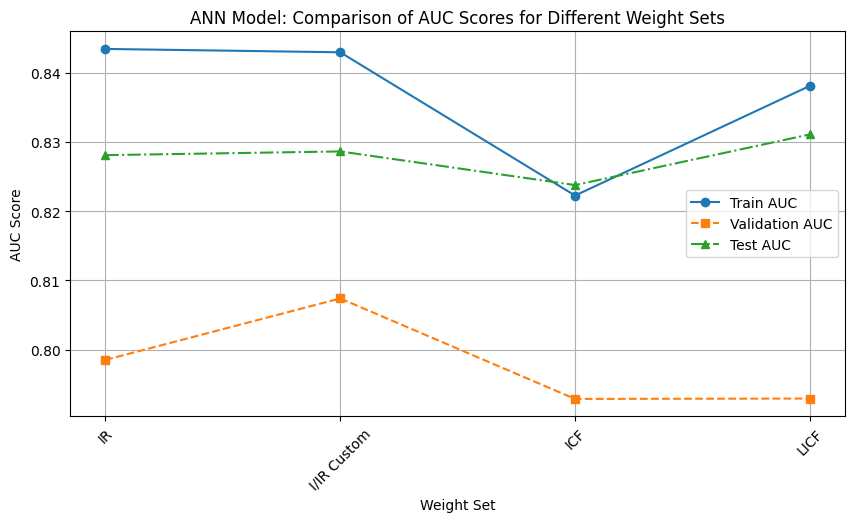

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df_results["Weight Set"], df_results["Train AUC"], marker='o', linestyle='-', label="Train AUC")
plt.plot(df_results["Weight Set"], df_results["Validation AUC"], marker='s', linestyle='--', label="Validation AUC")
plt.plot(df_results["Weight Set"], df_results["Test AUC"], marker='^', linestyle='-.', label="Test AUC")
plt.xlabel("Weight Set")
plt.ylabel("AUC Score")
plt.title("ANN Model: Comparison of AUC Scores for Different Weight Sets")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
###############################################################################

In [ ]:
def objective(trial):
    # Suggest hyperparameters to tune
    hidden_size1 = trial.suggest_int("hidden_size1", 64, 256)
    hidden_size2 = trial.suggest_int("hidden_size2", 32, 128)
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-3, log=True)

    # Define the MLP model
    model = nn.Sequential(
        nn.Linear(X1_train_tensor.shape[1], hidden_size1),
        nn.ReLU(),
        nn.Dropout(dropout),
        nn.Linear(hidden_size1, hidden_size2),
        nn.ReLU(),
        nn.Dropout(dropout),
        nn.Linear(hidden_size2, 1),
        nn.Sigmoid()
    )

    # Loss function and optimizer
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = nn.BCELoss()

    # Training loop for hyperparameter tuning
    for epoch in range(50):
        model.train()
        optimizer.zero_grad()
        output = model(X1_train_tensor)
        loss = criterion(output, y1_train_tensor)
        loss.backward()
        optimizer.step()

    # Evaluate on the validation set
    model.eval()
    with torch.no_grad():
        y_pred_valid = model(X1_valid_tensor).numpy()
        auc = roc_auc_score(y1_valid_tensor.numpy(), y_pred_valid)

    return auc  # Return the AUC score for validation

In [ ]:
# Initialize the Optuna study and maximize AUC
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=25)

# Display best hyperparameters
print("Best Parameters:", study.best_params)
print("Best Validation AUC:", study.best_value)

[I 2025-01-23 19:06:21,783] A new study created in memory with name: no-name-34421ed4-f740-4b28-9ad8-3f5d3bba8b58
[I 2025-01-23 19:06:24,016] Trial 0 finished with value: 0.8082366503961343 and parameters: {'hidden_size1': 243, 'hidden_size2': 79, 'lr': 0.000559834467430313, 'dropout': 0.25265498469452574, 'weight_decay': 1.9297449741313805e-06}. Best is trial 0 with value: 0.8082366503961343.
[I 2025-01-23 19:06:26,634] Trial 1 finished with value: 0.8063540925703353 and parameters: {'hidden_size1': 181, 'hidden_size2': 78, 'lr': 0.0004830731482925171, 'dropout': 0.46691456430298384, 'weight_decay': 0.0002449124848175535}. Best is trial 0 with value: 0.8082366503961343.
[I 2025-01-23 19:06:30,000] Trial 2 finished with value: 0.8161286762000539 and parameters: {'hidden_size1': 231, 'hidden_size2': 72, 'lr': 0.006117437303770916, 'dropout': 0.15593243195056658, 'weight_decay': 3.236863797519304e-06}. Best is trial 2 with value: 0.8161286762000539.
[I 2025-01-23 19:06:34,849] Trial 3 fi

Best Parameters: {'hidden_size1': 100, 'hidden_size2': 38, 'lr': 0.009301333862896522, 'dropout': 0.4126634574476751, 'weight_decay': 0.0009624674624491255}
Best Validation AUC: 0.8248056121072384


In [ ]:
best_params = study.best_params

# Defining the final MLP model with best hyperparameters
final_model = nn.Sequential(
    nn.Linear(X1_train_tensor.shape[1], best_params["hidden_size1"]),
    nn.ReLU(),
    nn.Dropout(best_params["dropout"]),
    nn.Linear(best_params["hidden_size1"], best_params["hidden_size2"]),
    nn.ReLU(),
    nn.Dropout(best_params["dropout"]),
    nn.Linear(best_params["hidden_size2"], 1),
    nn.Sigmoid()
)

optimizer = optim.Adam(final_model.parameters(), lr=best_params["lr"], weight_decay=best_params["weight_decay"])
criterion = nn.BCELoss()

In [ ]:
# Early stopping and class imbalance handling
patience = 30  # Increased patience
best_valid_auc = 0
epochs_no_improve = 0

# Calculate class weights for imbalance handling
pos_weight = torch.tensor([10.24], dtype=torch.float32)  # Adjust the positive weight based on IR

# Updated loss function with class weights
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

# Training loop
# Initialize lists to store the accuracies
train_accuracies = []
valid_accuracies = []
test_accuracies = []
train_auc_scores = []
valid_auc_scores = []
test_auc_scores = []

# Training loop with metrics for train, validation, and test sets
for epoch in range(100):
    final_model.train()
    optimizer.zero_grad()
    output_train = final_model(X1_train_tensor).flatten()

    # Compute training loss
    loss = criterion(output_train, y1_train_tensor.flatten())
    loss.backward()
    optimizer.step()

    # Calculate train accuracy and AUC
    y1_pred_train_binary = (torch.sigmoid(output_train) > 0.5).cpu().numpy().astype(int)
    train_accuracy = accuracy_score(y1_train_tensor.numpy(), y1_pred_train_binary)
    train_auc = roc_auc_score(y1_train_tensor.numpy(), torch.sigmoid(output_train).detach().numpy())

    # Validation
    final_model.eval()
    with torch.no_grad():
        y1_pred_valid_final = final_model(X1_valid_tensor).flatten()
        y1_pred_valid_binary = (torch.sigmoid(y1_pred_valid_final) > 0.5).cpu().numpy().astype(int)
        valid_accuracy = accuracy_score(y1_valid_tensor.numpy(), y1_pred_valid_binary)
        valid_auc = roc_auc_score(y1_valid_tensor.numpy(), torch.sigmoid(y1_pred_valid_final).detach().numpy())

    # Test
    with torch.no_grad():
        y1_pred_test_final = final_model(X1_test_tensor).flatten()
        y1_pred_test_binary = (torch.sigmoid(y1_pred_test_final) > 0.5).cpu().numpy().astype(int)
        test_accuracy = accuracy_score(y1_test_tensor.numpy(), y1_pred_test_binary)
        test_auc = roc_auc_score(y1_test_tensor.numpy(), torch.sigmoid(y1_pred_test_final).detach().numpy())

    # Store metrics for plotting
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)
    test_accuracies.append(test_accuracy)
    train_auc_scores.append(train_auc)
    valid_auc_scores.append(valid_auc)
    test_auc_scores.append(test_auc)

    # Early stopping based on validation AUC
    if valid_auc > best_valid_auc:
        best_valid_auc = valid_auc
        epochs_no_improve = 0
        best_model_weights = final_model.state_dict()
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping at epoch {epoch} with best validation AUC: {best_valid_auc:.4f}")
            break

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Train AUC: {train_auc:.4f}, Valid AUC: {valid_auc:.4f}")

Epoch 1, Loss: 1.2974, Train AUC: 0.4507, Valid AUC: 0.7153
Epoch 2, Loss: 1.2681, Train AUC: 0.6338, Valid AUC: 0.7787
Epoch 3, Loss: 1.2394, Train AUC: 0.7435, Valid AUC: 0.8010
Epoch 4, Loss: 1.2098, Train AUC: 0.7939, Valid AUC: 0.8088
Epoch 5, Loss: 1.1831, Train AUC: 0.8042, Valid AUC: 0.8116
Epoch 6, Loss: 1.1590, Train AUC: 0.8226, Valid AUC: 0.8120
Epoch 7, Loss: 1.1436, Train AUC: 0.8240, Valid AUC: 0.8132
Epoch 8, Loss: 1.1322, Train AUC: 0.8279, Valid AUC: 0.8146
Epoch 9, Loss: 1.1239, Train AUC: 0.8305, Valid AUC: 0.8158
Epoch 10, Loss: 1.1157, Train AUC: 0.8339, Valid AUC: 0.8168
Epoch 11, Loss: 1.1090, Train AUC: 0.8420, Valid AUC: 0.8180
Epoch 12, Loss: 1.1059, Train AUC: 0.8408, Valid AUC: 0.8195
Epoch 13, Loss: 1.0986, Train AUC: 0.8467, Valid AUC: 0.8199
Epoch 14, Loss: 1.0949, Train AUC: 0.8460, Valid AUC: 0.8204
Epoch 15, Loss: 1.0889, Train AUC: 0.8502, Valid AUC: 0.8192
Epoch 16, Loss: 1.0874, Train AUC: 0.8555, Valid AUC: 0.8183
Epoch 17, Loss: 1.0843, Train AUC

In [ ]:
# Load the best model weights after training
final_model.load_state_dict(best_model_weights)

# Final evaluation on the test set
print(f"\nFinal Test Accuracy: {test_accuracy:.4f}")
print(f"Final Test AUC: {test_auc:.4f}")
print("Final Classification Report (Test Set):\n", classification_report(y1_test_tensor.numpy(), y1_pred_test_binary))
print("Final Confusion Matrix (Test Set):\n", confusion_matrix(y1_test_tensor.numpy(), y1_pred_test_binary))


Final Test Accuracy: 0.4460
Final Test AUC: 0.8370
Final Classification Report (Test Set):
               precision    recall  f1-score   support

         0.0       0.99      0.39      0.56      1356
         1.0       0.14      0.97      0.25       144

    accuracy                           0.45      1500
   macro avg       0.57      0.68      0.41      1500
weighted avg       0.91      0.45      0.53      1500

Final Confusion Matrix (Test Set):
 [[529 827]
 [  4 140]]


#SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Step 1: Make a copy of the dataset
balanced_data = processed_data.copy()
balanced_data

,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,...,LastCheckupTime,AgeCategory,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,HeartConditionBinary,Outlier
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,6,0.0,0.0,8.0,1.68,113.40,40.35,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,9,2.0,5.0,8.0,1.73,104.33,34.97,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,7.0,10.0,6.0,1.73,104.33,34.97,1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,8,20.0,10.0,8.0,1.68,127.01,45.19,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,8,0.0,0.0,7.0,1.60,49.90,19.49,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,12,0.0,0.0,8.0,1.83,108.86,32.55,1,1
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,11,0.0,0.0,10.0,1.52,58.97,25.39,0,1
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,0.0,3.0,6.0,1.60,58.97,23.03,0,1
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,9,0.0,4.0,5.0,1.70,105.23,36.34,1,1


In [ ]:
class_counts2 = balanced_data ['HeartConditionBinary'].value_counts()
class_counts2

,count
HeartConditionBinary,
0,9146
1,854


In [ ]:
Xb = processed_data.drop(columns=["HeartConditionBinary"])  # Features
yb = processed_data["HeartConditionBinary"]                # Target

# Step 2: Split data into training and testing sets
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.2, random_state=42, stratify=yb)

In [ ]:
# Step 3: Apply SMOTE to the training set
smote = SMOTE(random_state=42)
Xb_train_smote, yb_train_smote = smote.fit_resample(Xb_train, yb_train)

In [ ]:
# Step 4: Check the class distribution after SMOTE
print("Class distribution before SMOTE:", Counter(yb_train))
print("Class distribution after SMOTE:", Counter(yb_train_smote))

Class distribution before SMOTE: Counter({0: 7317, 1: 683})
Class distribution after SMOTE: Counter({0: 7317, 1: 7317})


In [ ]:
scaler2 = StandardScaler()

# Fit on training data and transform both train and test sets
Xb_train_scaled = scaler2.fit_transform(Xb_train)
Xb_test_scaled = scaler2.transform(Xb_test)

In [ ]:
Xb_test_scaled_df = pd.DataFrame(Xb_test_scaled, columns=Xb_test.columns)
Xb_train_scaled_df = pd.DataFrame(Xb_train_scaled, columns=Xb_train.columns)

Training Logistic Regression...

Logistic Regression - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1829
           1       0.57      0.12      0.19       171

    accuracy                           0.92      2000
   macro avg       0.75      0.55      0.58      2000
weighted avg       0.89      0.92      0.89      2000


Logistic Regression - Confusion Matrix (Test Set):


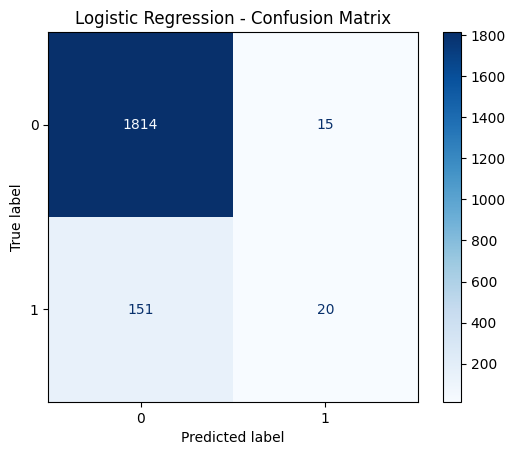

Training Random Forest...

Random Forest - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1829
           1       0.50      0.01      0.01       171

    accuracy                           0.91      2000
   macro avg       0.71      0.50      0.48      2000
weighted avg       0.88      0.91      0.87      2000


Random Forest - Confusion Matrix (Test Set):


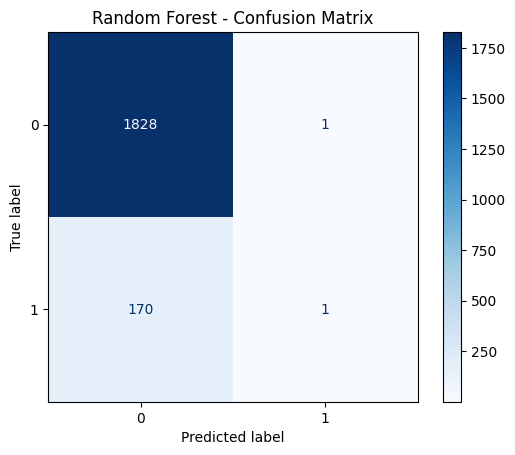

Training XGBoost...

XGBoost - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1829
           1       0.35      0.11      0.16       171

    accuracy                           0.91      2000
   macro avg       0.63      0.54      0.56      2000
weighted avg       0.87      0.91      0.88      2000


XGBoost - Confusion Matrix (Test Set):


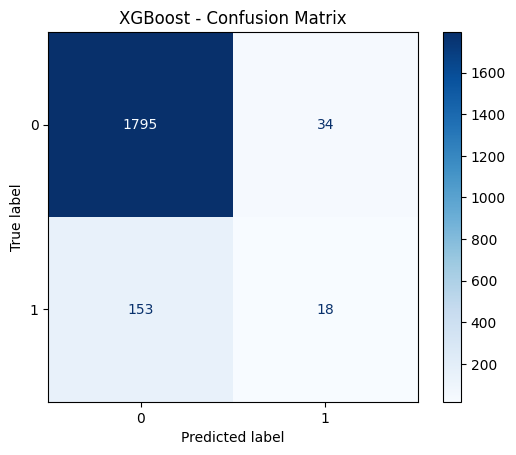

Training LightGBM...
[LightGBM] [Info] Number of positive: 683, number of negative: 7317
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 902
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 112
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085375 -> initscore=-2.371461
[LightGBM] [Info] Start training from score -2.371461

LightGBM - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1829
           1       0.39      0.06      0.11       171

    accuracy                           0.91      2000
   macro avg       0.66      0.53      0.53      2000
weighted avg       0.87      0.91      0.88      2000


LightGBM - Confusion Matrix (Test Set):


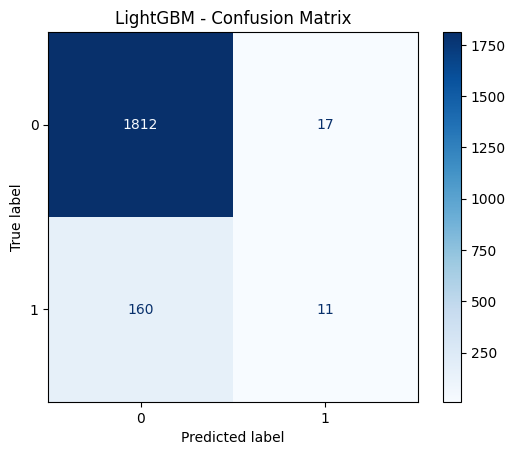

Training Naive Bayes...

Naive Bayes - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.95      0.73      0.83      1829
           1       0.18      0.61      0.27       171

    accuracy                           0.72      2000
   macro avg       0.56      0.67      0.55      2000
weighted avg       0.89      0.72      0.78      2000


Naive Bayes - Confusion Matrix (Test Set):


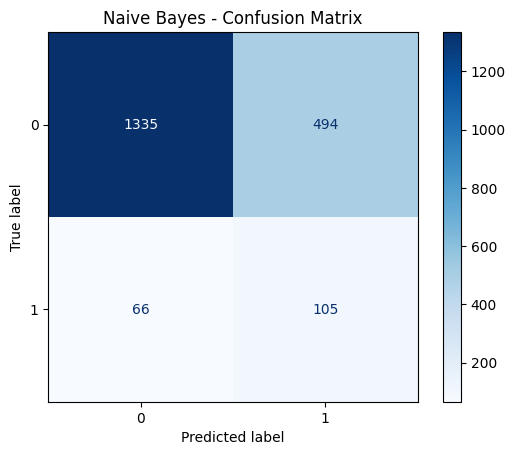


Model Performance Results:
                 Model  Train Accuracy  Test Accuracy   AUC-ROC  \
0  Logistic Regression        0.915625         0.9170  0.842134   
1        Random Forest        1.000000         0.9145  0.836683   
2              XGBoost        0.986375         0.9065  0.806899   
3             LightGBM        0.964125         0.9115  0.829674   
4          Naive Bayes        0.722875         0.7200  0.741234   

   F1-Score (Class 0)  F1-Score (Class 1)  Recall (Class 0)  Recall (Class 1)  
0            0.956247            0.194175          0.991799          0.116959  
1            0.955317            0.011561          0.999453          0.005848  
2            0.950490            0.161435          0.981411          0.105263  
3            0.953433            0.110553          0.990705          0.064327  
4            0.826625            0.272727          0.729907          0.614035  


<Figure size 1000x600 with 0 Axes>

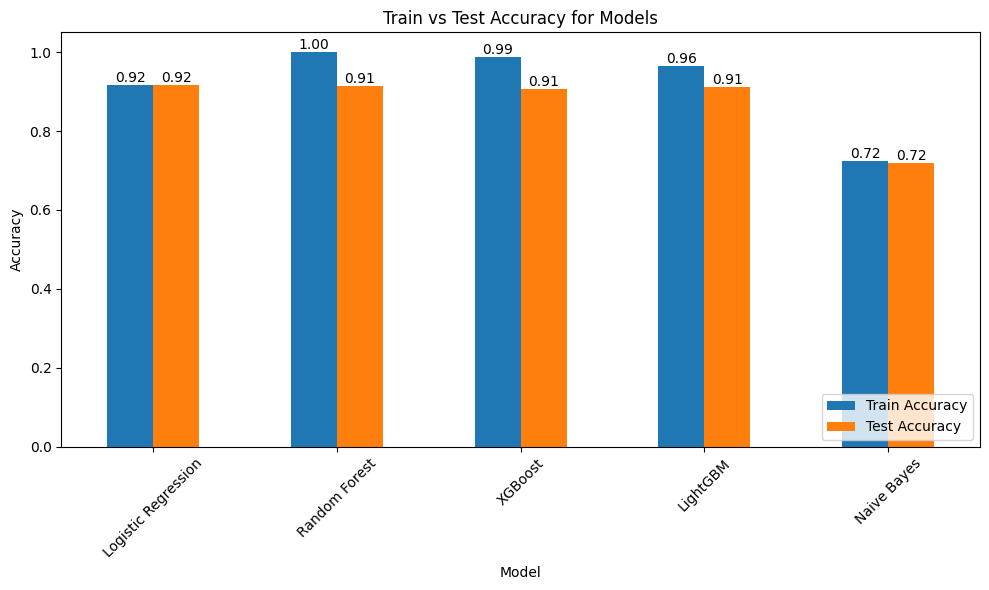

In [ ]:
modelsb = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10),
    "Random Forest": RandomForestClassifier(random_state=10),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=10),
    "LightGBM": LGBMClassifier(random_state=10),
    "Naive Bayes": GaussianNB()
}

results = []

# Train and evaluate each model
for name, model in modelsb.items():
    print(f"Training {name}...")

    # Train the model
    model.fit(Xb_train_scaled, yb_train)

    # Predictions
    yb_train_pred = model.predict(Xb_train_scaled)
    yb_test_pred = model.predict(Xb_test_scaled)

    # Accuracy
    train_accuracy = accuracy_score(yb_train, yb_train_pred)
    test_accuracy = accuracy_score(yb_test, yb_test_pred)

    # AUC-ROC
    auc_roc = None
    if len(set(yb_test)) == 2:  # Check if binary classification
        yb_test_prob = model.predict_proba(Xb_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
        if yb_test_prob is not None:
            auc_roc = roc_auc_score(yb_test, yb_test_prob)

    # Classification metrics
    classification_metrics = classification_report(
        yb_test, yb_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "AUC-ROC": auc_roc,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print classification report
    print(f"\n{name} - Classification Report (Test Set):")
    print(classification_report(yb_test, yb_test_pred))

    # Confusion matrix
    cm = confusion_matrix(yb_test, yb_test_pred)
    print(f"\n{name} - Confusion Matrix (Test Set):")
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\nModel Performance Results:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()